In [1]:
#_second_dataset_used_for_worldcloud_for_english_article_and_in_phd_thesis_in_anothor_folder
#_in_below_codes_for_comparing_the_classification_between_one_three_evaluator_and_the_model_classification_after_the_model_
#created_on_first_dataset

In [ ]:
#_LIBRARIES_#

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
#sayi_vektÃ¶r_matrislerini_standartlastirmakicin_algoritmaya_giris_oncesi
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [14]:
from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [15]:
from sklearn import decomposition, ensemble

In [16]:
!pip install wordcloud

In [5]:
#Egitim_test_seti_ayrimi_capraz dogrulama_karmasiklik matrisi_roc_egrisi_degerlendirme_olcutleri
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,log_loss
from sklearn.metrics import roc_auc_score, roc_curve

In [6]:
#SINIFLANDIRMA_ALGORITMALARI
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
!pip install xgboost
from xgboost import XGBClassifier

In [8]:
from warnings import filterwarnings
filterwarnings("ignore")

In [9]:
#VISUALIATION_Matplot ve Wordcloud
!pip install wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [11]:
durak_kelime_listesi=[" acaba","akabinde","akebinde"," altÄ±nda", " altta"," ama "," ancak"," aralarÄ±nda",
                     " arasÄ±nda "," arkadasÄ±nda"," artÄ±k"," aslÄ±nda "," aÅŸaÄŸÄ±dan", " aynen"," aynÄ± "," ayrÄ±ca ",
                     " bana "," baÅŸka ","bazen"," bazÄ± ","bazÄ±larÄ±","bazÄ±sÄ±","belki"," ben "," beni "," benim ",
                     "benzer ","benzeri "," bi "," bide "," bile ","binaenaleyh","bir defa","bir kere","bir kerecik",
                     "bir kimse","bir miktar","bir ÅŸey ","bir ÅŸeyi ","bir takÄ±m","bir vakitler","bir zamanlar",
                     "biraz ","birbirinden","birÃ§oÄŸu","birÃ§oklarÄ±","birde "," birisi ","birkaÃ§ ","birkaÃ§Ä± ","birÅŸey ",
                     "birÅŸeyi "," biÅŸey "," biz ","bizatihi"," bize "," bizi ","bizim ","bizimki","bizzat","boyunca",
                     "bÃ¶yle ","bÃ¶ylece ","bÃ¶ylelikle","bÃ¶ylesine","bu gibi","bu kadar","bu noktada","bu suretle",
                     "bu ÅŸekilde","bu tÃ¼rlÃ¼","bugÃ¼nlerde","buna benzer","bundan baÅŸka","bunlar ","bunun gibi",
                     "bununla birlikte","burada ","buraya ","bÃ¼tÃ¼n ","civarÄ±nda ","Ã§evresinde "," Ã§oÄŸu "," Ã§oÄŸuna ",
                     " Ã§oÄŸunu ","Ã§Ã¼nkÃ¼", "daha evvel","daha Ã¶nce ","daha ziyade"," dedi "," dedik "," dediler",
                     " dedim "," dedin "," dediniz "," deÄŸin "," demek ","demek ki"," demi ","dÄ±ÅŸarda ","dÄ±ÅŸarÄ±da ",
                     "dÄ±ÅŸarÄ±ya "," diÄŸer "," diÄŸeri ","diÄŸerleri "," dimi "," diye "," diyor ","dolayÄ± "," ediyor ",
                     " eÄŸer "," ek olarak "," elbette "," eskiden "," esnasÄ±nda "," etmek "," etrafÄ±nda "," evvelce ",
                     " evvelki ", "fakat"," falan "," felan "," filan "," gene ", " gibi "," hala ","halbuki","halinde",
                     " hangi "," hangisi "," hangisini "," hani "," hatta "," hep "," hepsi "," hepsine "," hepsini ",
                     "her biri ","her ikisi ","her ikisini ","her ne kadar","her tarafa "," herbiri ","herhangi bir ",
                     "herhangibir ","herkes ","herkese ","herkesi ","hiÃ§ birine","hiÃ§ birini ","hiÃ§birine ","hiÃ§birini ",
                     "hiÃ§ kimse ","iÃ§erisinde","iÃ§erisine"," iÃ§in "," iÃ§inde "," iÃ§inden "," iÃ§ine "," iken "," ikisi ",
                     " ikisini "," ilaveten "," ile "," ileri ", " ileride "," ileriye "," ilk "," ise "," iÅŸbu ", " iÅŸte",
                     "itibarÄ±yla","itibarÄ±yle","itibariyla","itibariyle","kadar ", "karÅŸÄ± ","kendi kendine ","kendi kendini ",
                     "kendi kendinin ","kendi kendisine ","kendi kendisini ","kendilerinde ","kendilerine ","kendilerini ",
                      "kendiliÄŸinden","kendim ","kendin ","kendine ", "kendini ","kendinin ","kendiniz ","kendinize ",
                      "kendinizde ","kendisi ","kendisinin "," keza "," kim "," kime "," kimi "," kimin "," kimisi "," kimse ",
                      " lakin "," madem "," mÄ±dÄ±r "," mÄ±sÄ±n "," mÄ±sÄ±nÄ±z "," mÄ±ydÄ± "," mÄ±yÄ±m "," midir "," misin "," misiniz ",
                      " miydi "," miyim "," mudur "," musun ","musunuz"," muydu ", " muyum ","mÃ¼ddetince"," mÃ¼dÃ¼r ",
                     " mÃ¼sÃ¼n "," mÃ¼sÃ¼nÃ¼z "," mÃ¼ydÃ¼ "," mÃ¼yÃ¼m ","nasÄ±l", "ne kadar","ne sebeple","ne vakit","ne zaman"," neden ",
                     "nedeniyle","nedir","nerede ","nereden","neredeyse ","nereye "," nesi ","netice olarak"," neyse ",
                     " niÃ§in "," niye "," o anda "," o halde "," o hususta "," o kadar "," o noktada "," o tÃ¼rlÃ¼ ","o vakit",
                     " o yer ", " o yere "," o zaman "," o zamanÄ±n "," o zamanÄ±nki "," oldukÃ§a"," olmak ","olmakla beraber",
                     "olur olmaz"," ondan ","ondan sonra"," onlar "," onlara "," onlardan "," onlarÄ± "," onlarÄ±n "," onlarÄ±nki",
                     " onu "," onun "," onunki "," ora "," orada "," oradaki "," orasÄ± "," orasÄ±nda "," oraya "," oysa ",
                     " oysaki "," Ã¶bÃ¼r "," Ã¶bÃ¼rÃ¼"," Ã¶nce "," Ã¶nceden "," Ã¶nceki ", " Ã¶nÃ¼nde "," Ã¶tede "," Ã¶teki "," Ã¶teye ",
                     " Ã¶tÃ¼rÃ¼ "," Ã¶yle "," Ã¶ylesine "," Ã¶zellikle","raÄŸmen","sadece"," sana ","sanki","sebebiyle","sebep ",
                     " sen ","senden"," size "," sizi "," sizin "," son derece"," sonra ","sonuÃ§ olarak","sÃ¶zcÃ¼k ","sÃ¼resince",
                     "ÅŸahÄ±s ","ÅŸahsÄ±","ÅŸayet"," ÅŸey "," ÅŸeyden "," ÅŸeye "," ÅŸeyi "," ÅŸeyler "," ÅŸÃ¶yle ","ÅŸu halde",
                     "ÅŸu kadar","ÅŸu sÄ±rada"," ÅŸuna "," ÅŸunda "," ÅŸundan ","ÅŸunlar "," ÅŸunu "," ÅŸunun ","ÅŸurada ","ÅŸuraya ",
                     " ta ki ","takdirde ","takriben"," tam ","tamamen","tamamÄ± ","tamÄ± tamÄ±na","tastamam","tekrar ","tÄ±pkÄ± ",
                     "tÄ±pkÄ±sÄ± "," tÃ¼m "," tÃ¼mÃ¼ ","Ã¼stelik"," Ã¼stÃ¼ "," Ã¼stÃ¼nde "," Ã¼stÃ¼ne "," Ã¼zere "," Ã¼zerinde ","vaktiyle",
                     " var ","vasÄ±tasÄ±yla"," vb."," vb "," ve "," veya ","veyahut "," vs "," vs."," ya da "," yada ",
                     " yahu "," yahut ","yakÄ±nÄ±nda ","yaklaÅŸÄ±k ","yalnÄ±z ","yanÄ±nda "," yani ","yanlÄ±z "," yapar "," yapÄ±yor ",
                     "yapmak ","yeniden","yerine "," yÄ±l ", " yine ","yoksa ","yukarÄ± ","yukarÄ±sÄ± ","yukarÄ±sÄ±nda","yukarÄ±ya ",
                     "yÃ¼zÃ¼nden ","zarfÄ±nda ","zaten "," zira ","ziyade "]

In [18]:
duygu_kelime_listesi_tamami=["10 puan","number one","10/10","6/10","8/10","acar","acele","acil","adalet","aferin","afiyet","aÄŸzÄ±mÄ±n su","azÄ±mÄ±n su","ak pak","aksiyon","ekÅŸÄ±n","alakalÄ±"," alfa","anÄ±nda","anlamlÄ±","aralÄ±ksÄ±z","durmadan","arkadaÅŸ","armaÄŸan","Ã¶dÃ¼l"," artÄ±","arzu"," asÄ±l ","asko","aÅŸko","aÅŸkito"," aÅŸÄ±k","aÅŸer"," aÅŸkÄ±n","avantajlÄ±",
             "baÄŸÄ±mlÄ±","bahÅŸiÅŸ","baÅŸarÄ±lÄ±","baÅŸlÄ±ca","bayÄ±l","bayram"," baz ","bebeÄŸim","beÄŸeni","beÄŸend","beklenti","beyefendi","bilerek","bilgili","bilinÃ§li","boÄŸazÄ±mdan geÃ§m"," bol ","bravo","buruk","canÄ±m Ã§ek","canÄ± Ã§ek","cansÄ±n","centilmen","ciddi","ivedi","Ã§abuk","Ã§are","Ã§ekiliÅŸ","Ã§eÅŸni","Ã§Ä±k aklÄ±","Ã§Ä±k hayat","Ã§Ä±lgÄ±n","Ã§ok iyi",
             "Ã§Ã¶zÃ¼m","daima","dayanÄ±ÅŸma","deÄŸerli","demlenmiÅŸ","dengeli","derle","derman","destek","devamlÄ±","dikkatli","dilek","doÄŸal","doÄŸru","dolu","doyam","dua","duyarlÄ±","dÃ¼rÃ¼st","dÃ¼ÅŸÃ¼nceli","dÃ¼zelt","dÃ¼zenli","efendi","eÄŸitim","eksiksiz","ekstra","ev yemeÄŸi","eline saÄŸlÄ±k","ellerinize saÄŸlÄ±k"," elit"," esas ",
             " esen "," eÅŸit"," etkili","faydalÄ±","fazilet","gayet","gerÃ§ek ","gerekli"," gÃ¶m","gÃ¶nÃ¼l","gÃ¶nlÃ¼","gÃ¶rev","gÃ¶rgÃ¼lÃ¼","gurur","gÃ¼ven","gÃ¼zel","hakikaten ","hakkaten","hakkÄ±yla","halis","hapÄ±r hupur","hapur hupur","hasret kal","hassas","hasta ol","hastasÄ±","havalÄ±","hayati","hayÄ±r ol","hayÄ±rlÄ±sÄ±","hayran","hediye",
             "helal","hemen","heves","hÄ±zla","hÄ±zlÄ±","hijyen"," hoÅŸ ","hukuk","huzur","iÃ§im","ikram","ilave"," ilgili","iltifat","incelik","indirim","insan sev","insani","inÅŸallah","inÅŸ "," istiyor"," ister"," istey"," istemiÅŸ"," isted","iÅŸbirli","iÅŸtahlÄ±","itibar","iyi fikir","iyi puan","iyi yemek","iyice","iyilik"," izin","jest",
             "joker","kabul","kalp","kalb","kalÄ±cÄ±","kaliteli","kanka","kardeÅŸim","kardeÅŸlerim","karlÄ±","kazan","kefil","kesintisiz","keyf","keyif","kÄ±zarmÄ±ÅŸ","kibar","kolay","kral","kurban","latif","layÄ±k","leziz","lezzetli","nefis","lokum","makbul","mantÄ±klÄ±","medeni","memnuniyet","merhamet","mesut","meÅŸhur","minimum tutar","minnet",
             " mis ","motivasyon","muhteÅŸem","mutlu","mÃ¼kemmel","mÃ¼sade","mÃ¼saade","mÃ¼sait ","nazik", "nitelikli","nizam","olaÄŸanÃ¼stÃ¼","olumlu","onay","onur","optimum","otomasyon","otomatik","Ã¶ncelik","Ã¶nem","Ã¶ner","Ã¶zel","Ã¶zendir","Ã¶zenli","patla"," piri ","piÅŸkin","piÅŸmiÅŸ"," pls ","pozitif","prestij","profesyonel","promosyon","rahat",
             "rica","rÃ¼zgar","safa","saÄŸlam","saÄŸlÄ±klÄ±","sakin","salim","saygÄ±lÄ±","saygÄ±n","sefa"," seri","sev","sÄ±cacÄ±k","sipariÅŸ onay","sistem","sorumlu","stalk","sÃ¼rekli","sÃ¼rpriz","ÅŸahane","ÅŸerefine","ÅŸevk","ÅŸÄ±mart","ÅŸÃ¼kran","ÅŸÃ¼kÃ¼r","taahhÃ¼t","tadÄ± gÃ¼zel","takdir","takip","taktir","talep","tarafsÄ±z","tatlÄ±","tavla","taze","tecrÃ¼be",
             "teklif","telafi","temel","temiz","terbiyeli","teÅŸekkÃ¼r","teÅŸfik","teÅŸvik"," tez ","titiz","tolerans","toparla","toplu","tutul","ucuz","umut","usta","uyanÄ±k","uygun"," uyum","Ã¼cretsiz","Ã¼stlen","Ã¼stÃ¼n","vaktinde","verimli","vurul","yakÄ±n","yakÄ±ÅŸÄ±klÄ±","yakÄ±ÅŸÄ±r","yarar","yardÄ±m","yaÅŸasÄ±n","yemek video","yeni ","yerinde","yeterli",
             "yoÄŸunlaÅŸ","yÃ¶ntem","yÃ¼ce","zahmet olmazsa","zevkli","abart","abes","abidik gubidik","abuk sabuk","antin kuntin","absÃ¼rt","acayip","acemi","toy"," acÄ± ","acitasyon","aÃ§ kald"," aÃ§Ä±k "," aÃ§Ä±m"," aÃ§Ä±z","aÃ§lÄ±ktan bayÄ±l"," adi "," aÄŸÄ±r","aÄŸlÄ±cam","aÄŸlicam","ahlaksÄ±z"," aksak"," aksi ","alakasÄ±z","alt tarafÄ±"," amk","amq","aq"," mk ",
             "skm","skt"," sÃ¶v","andaval","anksiyete","anlamsÄ±z","arÄ±za","asÄ±lsÄ±z","aÅŸaÄŸÄ±","aÅŸÄ±nmÄ±ÅŸ","aÅŸÄ±rÄ± yaÄŸ","Ã§ok yaÄŸlÄ±","ayar ol"," ayÄ±p"," ayÄ± "," azal","azar ye"," azarla","baÄŸlanam","baÄŸlanm","bahane","balÄ±k hafÄ±za","balon"," banla","yasak","basit","baÅŸarÄ±sÄ±z"," bat","bayaÄŸÄ±","bayat","baygÄ±n","beceriksiz","beddua","beÄŸenm","beklet",
             "belanÄ± versin","belanÄ±zÄ± versin","bencil","bitmiÅŸtir","berbat","bereket","beter","beyhude","beyinsiz","bez","bÄ±kkÄ±n","bÄ±ktÄ±m","bilgisiz","bilinÃ§siz"," bilme","bin piÅŸman","daha asla","bitkin","blokl"," bok ","bomboÅŸ","boÅŸ yere","boÅŸuna"," boÅŸ ","botla","boykot","bozuk","bozulmuÅŸ","bÃ¶cek"," bulan"," buz ","donmuÅŸ","bÃ¼yÃ¼tme",
             "cahil","camÄ±ÅŸ","cansÄ±z","cenabet","cennet","cereme","cesaretim yok","ceza"," cÄ±lk","crash","Ã§akal","Ã§amur","Ã§ekin","Ã§eliÅŸki","Ã§Ä±kar","Ã§Ä±kÄ±ÅŸ","Ã§Ä±ldÄ±r"," Ã§iÄŸ ","piÅŸmemiÅŸ","Ã§irkin","Ã§ok kÃ¶tÃ¼","Ã§Ã¶kmÃ¼ÅŸ","Ã§Ã¶ktÃ¼"," Ã§Ã¶p ","Ã§Ã¼rÃ¼","daÄŸ baÅŸ","daÄŸbaÅŸ","daÄŸÄ±n baÅŸ","daÄŸÄ±l","daÄŸÄ±nÄ±k","dalgÄ±n","dandik"," dar ","dayanma sÄ±nÄ±r","dedikodu","deÄŸersiz",
             "deli ol","delir","dengesiz","dert"," dÄ±ÅŸÄ±","diken Ã¼st","doym","dÃ¶kÃ¼lmÃ¼ÅŸ","dÃ¶nek","dram","duyar kas","duygu sÃ¶mÃ¼r","duyarsÄ±z","dÃ¼ÄŸÃ¼m","dÃ¼ÅŸman","dÃ¼ÅŸÃ¼k","dÃ¼ÅŸÃ¼ncesiz","dÃ¼zenbaz","dÃ¼zensiz","edepsiz"," eksik "," eksi ","eleÅŸtiri","enayi"," engel","erimiÅŸ"," ertele"," eÅŸek ","eyvah"," ezik","fake","fani","fasa fiso","faydasÄ±z","fazla",
             "felaket","feleÄŸim ÅŸaÅŸ","fena","fÄ±rsatÃ§","fiyasko","gaflet","gazabÄ±na uÄŸra","geber","gecik","geÃ§ gelen","geÃ§ici","gelm","gereksiz","gergin","geril","getirem","getirm","gÄ±cÄ±k","gÄ±na gel","gÃ¶rgÃ¼sÃ¼z","gÃ¶zÃ¼ karart","gudubet","hadsiz","hak etmiyor","hakaret","haksÄ±z","halt","hamur","haram","hatalÄ±","hayal kÄ±rÄ±k","haysiyetsiz","hayvan",
             "hazetm","hikaye"," Ä±rak "," uzak","Ä±slanm","Ä±ssÄ±z","iade","ibne","iflah olm","iflas","iÄŸren","ihmal","ihtar"," ilgisiz"," illet","insaf","iptal","israf"," isteme"," istemiyor","istismar","isyan","iÅŸkence","iÅŸsiz","iÅŸtahsÄ±z"," itici","iyi deÄŸil","kaba ","kafayÄ± ye","kafayÄ± yi","kahretsin","kahrolsun","kalas","kaldÄ±k","kaldÄ±m",
             " kalm","kan emici","kanser","kapÄ±sÄ±nÄ±n Ã¶nÃ¼","kara kara dÃ¼ÅŸÃ¼n","kara liste","karÄ±ÅŸÄ±k","kaybet","kayÄ±ÅŸ","kazÄ±k","kendimi tut","keÅŸke"," kÄ±nÄ±","kÄ±rÄ±l","kÄ±tlÄ±k","kifayetsiz","kilo ","kirlenmiÅŸ","kirli","kitle","kokan","kokm","kopya","korkunÃ§","kÃ¶le","kÃ¶mÃ¼r","kÃ¶tÃ¼ ","kÃ¶ylÃ¼"," kuru ","kusm","kusur","kÃ¼Ã§Ã¼k","kÃ¼flÃ¼","kÃ¼stah"," laf ",
             "lakayÄ±t","lanet","nalet","lastik","leke"," leÅŸ ","lezzetsiz","lÃ¼zumsuz","maÄŸdur","mahsur","mantÄ±ksÄ±z","manyak","maraz doÄŸ","mesele","midem bulan","mikrop","minik","muhatap","mutsuz","nefret","negatif","olacaksa ol","odun"," oha ","olumsuz","or*spu Ã§ocuÄŸu","or*spuÃ§ocuÄŸu","orospu","ortadan kaldÄ±r","oyala","Ã¶kÃ¼z"," Ã¶lÃ¼ ","Ã¶zensiz",
             "Ã¶zÃ¼r","pahalÄ±","panik","paranoyak","pezevenk"," pis ","piÅŸman","problem","psikopat","rasgele","reddet","rezalet","rezil","risk","rÃ¶tar","ruh hasta","saÃ§ma"," saÃ§ ","saÄŸlÄ±ksÄ±z","sahte","sakat","sakÄ±nca","salak","salla","saman","sasÄ±","savsak","saygÄ±sÄ±z","sebepsiz","serseri","sert","ses seda yok","sÄ±fÄ±r","sÄ±kÄ±l","sÄ±kÄ±ntÄ±","sÄ±radan",
             "sÄ±zlan","sinek","sipariÅŸ hata","sipariÅŸ iptal","sitem","sivrisinek","skandal","soÄŸukta","soÄŸuk","soÄŸumuÅŸ","sorm","sorumsuz","sorun","sÃ¶mÃ¼r","sÃ¶zde"," suÃ§","sÃ¼rÃ¼n","ÅŸaka","ÅŸans gÃ¼lm","ÅŸerefsiz","ÅŸeytan","ÅŸÄ±marÄ±k","ÅŸikayet","ÅŸiÅŸir","ÅŸiÅŸko patates","ÅŸopar","ÅŸÃ¼pheli","taciz","tadÄ± yok","takat","talan et","talihsiz","tasa ",
             "taÅŸ ","tatava yap","tatsÄ±z","tehlike","tekel","telaÅŸ","tembel","terbiyesiz","ters","tÄ±rs","toz","trib","trip","tuzsuz","tÃ¼ketme","tÃ¼kÃ¼r","tÃ¼y","uÃ§urum","ufak","uÄŸraÅŸ","ukala"," ulan","ulaÅŸam","ulaÅŸmam","ulaÅŸm","umrumda deÄŸil","umrunda deÄŸil","umursam","unutmuÅŸ","unutul"," usan"," utan","uyar","uydur","Ã¼rkÃ¼tÃ¼cÃ¼"," Ã¼ÅŸen","Ã¼zgÃ¼n",
             "Ã¼zÃ¼l","Ã¼zÃ¼yo","Ã¼zÃ¼cÃ¼","vahim","vasat","vazgeÃ§","verem","verimsiz","vÄ±cÄ±k","vicdan azab","vicdansÄ±z","vizyonsuz","yaÄŸÄ± don","yaÄŸsÄ±z","yalaka","yalan","yanlÄ±ÅŸ","yamuk","yanÄ±k","yanÄ±l","yanmÄ±ÅŸ","yapÄ±ÅŸmÄ±ÅŸ","yaram","yaratÄ±k","yaÅŸlan","yavaÅŸ","yavÅŸak","yazÄ±k","yemek yok","yemiyo","yerlerde","yeter artÄ±k","yeter yahu","yetersiz"," yok ",
             "yorgun","zararlÄ±","zarar ","zehir","zevksiz","zÄ±kkÄ±m","ziyan","zor bela","zoraki","zorla","zorunda bÄ±rak","zorunda kal"]
duygu_kelime_listesi_tamami

['10 puan',
 'number one',
 '10/10',
 '6/10',
 '8/10',
 'acar',
 'acele',
 'acil',
 'adalet',
 'aferin',
 'afiyet',
 'aÄŸzÄ±mÄ±n su',
 'azÄ±mÄ±n su',
 'ak pak',
 'aksiyon',
 'ekÅŸÄ±n',
 'alakalÄ±',
 ' alfa',
 'anÄ±nda',
 'anlamlÄ±',
 'aralÄ±ksÄ±z',
 'durmadan',
 'arkadaÅŸ',
 'armaÄŸan',
 'Ã¶dÃ¼l',
 ' artÄ±',
 'arzu',
 ' asÄ±l ',
 'asko',
 'aÅŸko',
 'aÅŸkito',
 ' aÅŸÄ±k',
 'aÅŸer',
 ' aÅŸkÄ±n',
 'avantajlÄ±',
 'baÄŸÄ±mlÄ±',
 'bahÅŸiÅŸ',
 'baÅŸarÄ±lÄ±',
 'baÅŸlÄ±ca',
 'bayÄ±l',
 'bayram',
 ' baz ',
 'bebeÄŸim',
 'beÄŸeni',
 'beÄŸend',
 'beklenti',
 'beyefendi',
 'bilerek',
 'bilgili',
 'bilinÃ§li',
 'boÄŸazÄ±mdan geÃ§m',
 ' bol ',
 'bravo',
 'buruk',
 'canÄ±m Ã§ek',
 'canÄ± Ã§ek',
 'cansÄ±n',
 'centilmen',
 'ciddi',
 'ivedi',
 'Ã§abuk',
 'Ã§are',
 'Ã§ekiliÅŸ',
 'Ã§eÅŸni',
 'Ã§Ä±k aklÄ±',
 'Ã§Ä±k hayat',
 'Ã§Ä±lgÄ±n',
 'Ã§ok iyi',
 'Ã§Ã¶zÃ¼m',
 'daima',
 'dayanÄ±ÅŸma',
 'deÄŸerli',
 'demlenmiÅŸ',
 'dengeli',
 'derle',
 'derman',
 'destek',
 'devamlÄ±',
 'dikkatli',
 'dilek',
 'doÄŸal',
 '

In [20]:
urun_kelime_listesi_tamami=["abur cubur"," acÄ± ","adet","tane","aÄŸÄ±z tadÄ±","altÄ±n gÃ¼nÃ¼ yiyecek","ana yemek","aperatif","aÅŸÄ±rÄ± yaÄŸ","Ã§ok yaÄŸlÄ±", "ayran","azÄ±cÄ±k",
                                             "baharat"," bal ","bayat","besin","biber","biskÃ¼vi"," bol ","bozuk","bozulmuÅŸ","bÃ¶cek","bÃ¶rek","burger","buruk"," buz ","donmuÅŸ","bÃ¼yÃ¼k boy","canÄ±m Ã§ek","canÄ± Ã§ek",
                                             "cips","Ã§eÅŸni","Ã§evirm","Ã§Ä±tÄ±r"," Ã§iÄŸ ","piÅŸmemiÅŸ","Ã§oban"," Ã§Ã¶p ","Ã§Ã¶rek","daÄŸÄ±l","damak tadÄ±","damak zevk","dolma","domates","double","duble","doym","doyum",
                                             "doyurucu","dÃ¶ner","dÃ¼nden kalan","dÃ¼rÃ¼m"," ekle ","ekÅŸim"," ekmek "," eksik "," ekÅŸi","el yapÄ±m","ev yapÄ±m","ev yemeÄŸi"," erzak","eÅŸantiyon"," etli"," etsiz",
                                             "fast food","fastfood","futuristik","garnitÃ¼r","gevrek","gÄ±da","gluten","gram","gurme","hafif yemek","hamburger","hamur","haram","hastasÄ±","hatay usul","havyar",
                                             "hazÄ±r yemek","helal"," hoÅŸ "," Ä±sÄ±t","Ä±spanak","iade","iÃ§ecek"," iÃ§ki ","iÃ§li kÃ¶fte","ikram","kadÄ±nbudu","kalÄ±n hamur","karbonhidrat","karÄ±ÅŸÄ±k","kaÅŸarlÄ±",
                                             "katÄ±k","kavurma","kayÄ±ÅŸ","kÃ¶pek yem","kestane","ketÃ§ap"," kÄ±l ","kÄ±tÄ±r","kÄ±yma","kÄ±zarmÄ±ÅŸ","kÄ±zartm","kilo ","kiÅŸi baÅŸÄ±","klasik","kokan","kokm","koku",
                                             "konserve","kÃ¶fte","kÃ¶mÃ¼r","kurt"," kuru ","kusm","kuÅŸbaÅŸÄ±","kÃ¼Ã§Ã¼k","kÃ¼flÃ¼","lahmacun","lastik","latif","latte","leziz","lezzetli","nefis","lezzetsiz","lokma",
                                             "lokum","lÃ¼fer","makarna","martÄ± eti","marul"," maya","mayonez","meÅŸrubat","meyve","meze ","mide","minik"," mis ","nane","organik","orta boy","Ã¶ÄŸÃ¼n","Ã¶lÃ§Ã¼",
                                             "patates","patlÄ±can","peynir","pide","pilav","piÅŸmiÅŸ","pizza","poÄŸaÃ§a","porsiyon","pÃ¶rsÃ¼m","reÃ§el"," saÃ§ ","saÄŸlÄ±klÄ±","saÄŸlÄ±ksÄ±z","salata","salÃ§a","saman",
                                             "sarÄ±msak","sasÄ±","sebze","sÄ±cacÄ±k","sinek","soÄŸan","soÄŸuk","soÄŸumuÅŸ","son kullanma tarih"," sos ","sucuk","sufle","sulu","ÅŸalgam","ÅŸeker","ÅŸerbet","taraftar",
                                             "taÅŸ ","tatlÄ±","tatsÄ±z","tavuk","taze","tereyaÄŸ","turÅŸu","tuzlu","tuzsuz","ufak","urfa","Ã¼rÃ¼n","vegan","vejetaryan","vejeteryan","vÄ±cÄ±k","yaÄŸÄ± don","yaÄŸlÄ±",
                                             "yaÄŸsÄ±z","yanÄ±k","yanmÄ±ÅŸ","yapÄ±ÅŸmÄ±ÅŸ","yarÄ±m","yemiÅŸ","yeÅŸillik","yÃ¶resel","yudum","yumurta","zehir","zevkli","â‚º","lira","nakit"," para "," tl","3d secure",
                                             "abone","acele","acemi","toy"," aÃ§Ä±k "," aÃ§Ä±l","adalet"," adam","adisyon"," adi ","adres","ikamet","ahlaksÄ±z","ak pak"," aksi ","aktarm","alakalÄ±","alakasÄ±z",
                                             " alan ","bÃ¶lge","civar"," etraf","konum","mahal","mevki","muhit","semt","sokak","alÃ§al"," algÄ±","alÄ±ÅŸ veriÅŸ","alÄ±ÅŸveriÅŸ","alt limit","alt sÄ±nÄ±r","altyap",
                                             "anasayfa","ana sayfa","anÄ±nda","anlamsÄ±z","anlaÅŸÄ±lm","anlayÄ±ÅŸ","aplikasyon"," app","mobil uygulama","aracÄ±"," asÄ±l ","asistan","aÅŸaÄŸÄ±"," ayÄ± "," azarla",
                                             "baÄŸlantÄ±","bahÅŸiÅŸ","bakÄ±m","basit","baÅŸlÄ±ca","bayaÄŸÄ±"," baz ","beceriksiz","bedel","beklet","belgeli","bencil","beyhude","beyinsiz","bÄ±Ã§ak","bildiri",
                                             "bilet","bilgisiz"," anda ","blokl","boÅŸ yere","boÅŸuna","bÃ¶lÃ¼m","buton","cahil","callcenter","call center","canlÄ± destek","canlÄ± yardÄ±m","cevap","crash",
                                             "cÃ¼zdan","Ã§aba","ivedi","Ã§aÄŸrÄ±","Ã§akal","Ã§alÄ±ÅŸan","Ã§alÄ±ÅŸm","Ã§atal","Ã§eliÅŸki","Ã§evre","Ã§Ä±kÄ±ÅŸ","Ã§iÃ§ek","Ã§irkin","Ã§Ã¶kmÃ¼ÅŸ","Ã§Ã¶ktÃ¼","daÄŸ baÅŸ","daÄŸbaÅŸ","daÄŸÄ±n baÅŸ",
                                             "daÄŸÄ±nÄ±k","daÄŸÄ±tÄ±cÄ±","daÄŸÄ±tÄ±m aÄŸÄ±","dakika","dk","saat","dalga","dalgÄ±n","danÄ±ÅŸma","davranÄ±ÅŸ","davranm","debit","setcard","sodexo","multinet","deÄŸerli",
                                             "deÄŸersiz","deney","denk","dert","destek","devre","dezenfekte","dÄ±ÅŸ kapÄ±","dÄ±ÅŸardan sipariÅŸ","dÄ±ÅŸarÄ±dan sipariÅŸ","dikkate alm","diyet","doÄŸru","dÃ¶nem",
                                             "duyarsÄ±z","dÃ¼kkan","dÃ¼rÃ¼st","dÃ¼ÅŸÃ¼k","dÃ¼ÅŸÃ¼ncesiz","dÃ¼ÅŸÃ¼nceli","dÃ¼zensiz","edepsiz"," ederi"," eÄŸitim","eksiÄŸi","eleman","emekÃ§i","entegrasyon","entegre",
                                             " esas ", " esnaf "," eÅŸek "," eÅŸit","fatura","faydasÄ±z","fazilet","fazla","fiat","fiyat","filtre","firma"," fiÅŸ","gamsÄ±z","gayret","gece yarÄ±sÄ±","gecik",
                                             "geÃ§ gelen","gel al","gel-al","gelen abi","gelen arkadaÅŸ","gelir","gerÃ§ek ","gereksiz","getiren","getirtm","gÃ¶nderi","gÃ¶nderm","gÃ¶rev","gÃ¶rgÃ¼lÃ¼","gÃ¶rgÃ¼sÃ¼z",
                                             "gÃ¶rmem","gÃ¶rÃ¼ÅŸ","gÃ¶tÃ¼rm","haberleÅŸ","hack","hain","hakaret","hata ver","havalÄ±","hayvan","hediye","hemen","hes cod","hes kod","hesap","hÄ±zlÄ±","hizmet","hukuk",
                                             " Ä±rak "," uzak","Ä±smarlam"," icra","ihmal","ihtar"," ileti","iletm"," ilgili","ilgisiz"," iliÅŸki"," ilkel","indirim","influencer","insan saÄŸlÄ±ÄŸÄ±","internet site",
                                             "internetten yemek sipariÅŸi"," iÅŸÃ§i","iÅŸlem","iÅŸletme","iÅŸyeri"," izin","joker","kaba ","kaide","kalas","kampanya","kapalÄ±","kapanmÄ±ÅŸ","kapanÄ±ÅŸ","kapatmÄ±ÅŸ","kapatmak",
                                             "kapÄ±da Ã¶de","kara liste","karaliste","kargocu","karÅŸÄ±lÄ±","kasiyer","kaÅŸÄ±k","katÄ±r","kaytar","kazan","kazÄ±k","kdv","kebapÃ§Ä±","kÄ±sÄ±r","kÄ±ymetli","kifayetsiz",
                                             "kokorecci","kokoreÃ§Ã§i","komisyon","konsept","kota","kart","kullanÄ±cÄ± dost","kupon","kural","kuriye","kurye","kurumsal","kÃ¼Ã§Ã¼mseme","kÃ¼stah","lakayÄ±t","legal",
                                             "mail","posta","maliye","malzeme","mekan","memur","mendil","menÃ¼","merkez","mesafe","mesaj","mesele","meslek","mevsim","mezun","miktar","min tutar","min paket tutar",
                                             "min sipariÅŸ tutar","minimum sipariÅŸ tutar","minimum tutar","misli","motokurye","motosiklet","motor","muamele","muhatap","mukabil","mutfak","mÃ¼cadele","mÃ¼davim","mÃ¼ddet",
                                             "mÃ¼ÅŸteri","naÃ§iz","nazik","negatif","nerde kal","nerden gel","nizam","nÃ¶bet","numara","odun","online","operatÃ¶r","ortak","otomasyon","otomatik","Ã¶deme","Ã¶dev","Ã¶kÃ¼z",
                                             "Ã¶ner","Ã¶rgÃ¼t","Ã¶zen gÃ¶ster","Ã¶zenli","Ã¶zensiz","pahalÄ±","paket servis","paket sipariÅŸ","paket"," pay ","peÃ§ete","perhiz","personel","pipet","platform","portÃ¶r",
                                             "pos cihazÄ±","poÅŸet","pratik","promosyon","prosedÃ¼r","puan","range","rasgele","rastgele","rejim","reklam","restoran","rozet","rÃ¶tar","ruhsat","rut dÄ±ÅŸÄ±","saÄŸanak",
                                             "salah","sapa","satÄ±ÅŸ","savsak","saygÄ±lÄ±","saygÄ±n","saygÄ±sÄ±z","sepetÃ§i","yemekÃ§i"," seri","server","servis","sezon","sÄ±radan","sÄ±rÄ±lsÄ±klam","sipariÅŸ hata",
                                             "sipariÅŸ hattÄ±","sipariÅŸ iptal","sipariÅŸ not","sipariÅŸ onay","sipariÅŸ Ã¶nce","sipariÅŸ sonra","sistem","sitem","sms","soÄŸuk hava","soÄŸukta","sorumlu","sorumsuz",
                                             "sorun","stil","story","sunucu"," sÃ¼re","ÅŸimdi","ÅŸirket","ÅŸube","taciz","tahsil","tahsis","taksit","tarih","tarz","taÅŸÄ±","tatbik","tayfa","tecrÃ¼be","tehlike",
                                             "tek kiÅŸi","teklif","teknoloji","telefon","temas","temel","temiz","temsilci","terbiyesiz","ters","teslim"," tez ","ticket","titiz","token","tolerans","toplam",
                                             "trafik","trib","trip","tutar","tutum","tÃ¼ketici","tÃ¼kÃ¼r","tÃ¼re","tÃ¼y","uÄŸraÅŸ","ukala","ulaÅŸam","ulaÅŸmam","ulaÅŸm","ulaÅŸÄ±m","umursam","unutmuÅŸ","usta"," usul","uyar",
                                             "uygula"," uyum","Ã¼cret ","Ã¼yeli","Ã¼zÃ¼cÃ¼","vakit"," vale","vasÄ±ta","verimli","verimsiz","viral","virÃ¼s","web site","webchat","yaÄŸmur","yakÄ±ÅŸÄ±klÄ±","yalÄ±n","yanlÄ±ÅŸ","yanÄ±t",
                                             "yaptÄ±rÄ±m","yarar","yasal","yatkÄ±n","yavÅŸak","yazÄ±lÄ±m","yerel","yetersiz","yetkili","yoÄŸunluk","yollam"," yol "," yorum","yoz","yÃ¶netici","yÃ¶ntem","yÃ¼rÃ¼tm","zaman"," zam ",
                                             "zararlÄ±","zihniyet"]
urun_kelime_listesi_tamami

['abur cubur',
 ' acÄ± ',
 'adet',
 'tane',
 'aÄŸÄ±z tadÄ±',
 'altÄ±n gÃ¼nÃ¼ yiyecek',
 'ana yemek',
 'aperatif',
 'aÅŸÄ±rÄ± yaÄŸ',
 'Ã§ok yaÄŸlÄ±',
 'ayran',
 'azÄ±cÄ±k',
 'baharat',
 ' bal ',
 'bayat',
 'besin',
 'biber',
 'biskÃ¼vi',
 ' bol ',
 'bozuk',
 'bozulmuÅŸ',
 'bÃ¶cek',
 'bÃ¶rek',
 'burger',
 'buruk',
 ' buz ',
 'donmuÅŸ',
 'bÃ¼yÃ¼k boy',
 'canÄ±m Ã§ek',
 'canÄ± Ã§ek',
 'cips',
 'Ã§eÅŸni',
 'Ã§evirm',
 'Ã§Ä±tÄ±r',
 ' Ã§iÄŸ ',
 'piÅŸmemiÅŸ',
 'Ã§oban',
 ' Ã§Ã¶p ',
 'Ã§Ã¶rek',
 'daÄŸÄ±l',
 'damak tadÄ±',
 'damak zevk',
 'dolma',
 'domates',
 'double',
 'duble',
 'doym',
 'doyum',
 'doyurucu',
 'dÃ¶ner',
 'dÃ¼nden kalan',
 'dÃ¼rÃ¼m',
 ' ekle ',
 'ekÅŸim',
 ' ekmek ',
 ' eksik ',
 ' ekÅŸi',
 'el yapÄ±m',
 'ev yapÄ±m',
 'ev yemeÄŸi',
 ' erzak',
 'eÅŸantiyon',
 ' etli',
 ' etsiz',
 'fast food',
 'fastfood',
 'futuristik',
 'garnitÃ¼r',
 'gevrek',
 'gÄ±da',
 'gluten',
 'gram',
 'gurme',
 'hafif yemek',
 'hamburger',
 'hamur',
 'haram',
 'hastasÄ±',
 'hatay usul',
 'havyar',
 'hazÄ±

In [25]:
guclendirilmis_duygu_sozluk=["10 puan","number one","10/10","6/10","8/10","acar","acele","adalet","aferin","afiyet","aÄŸzÄ±mÄ±n su","ak pak","aksiyon","alakalÄ±"," alfa","anÄ±nda","anlamlÄ±","aralÄ±ksÄ±z","arkadaÅŸ"," artÄ±","arzu"," asÄ±l "," aÅŸÄ±k","aÅŸer"," aÅŸkÄ±n","avantajlÄ±",
             "baÄŸÄ±mlÄ±","bahÅŸiÅŸ","baÅŸarÄ±lÄ±","baÅŸlÄ±ca","bayÄ±l","bayram"," baz ","bebeÄŸim","beÄŸeni","beklenti","beyefendi","bilerek","bilgili","bilinÃ§li","boÄŸazÄ±mdan geÃ§m"," bol ","bravo","buruk","canÄ± Ã§ek","cansÄ±n","centilmen","ciddi","Ã§are","Ã§ekiliÅŸ","Ã§eÅŸni","Ã§Ä±k hayat","Ã§Ä±lgÄ±n","Ã§ok iyi",
             "Ã§Ã¶zÃ¼m","daima","dayanÄ±ÅŸma","deÄŸerli","demlenmiÅŸ","dengeli","derle","derman","destek","devamlÄ±","dikkatli","dilek","doÄŸal","doÄŸru","dolu","doyam","dua","duyarlÄ±","dÃ¼rÃ¼st","dÃ¼ÅŸÃ¼nceli","dÃ¼zelt","dÃ¼zenli","efendi","eÄŸitim","eksiksiz","ekstra","ev yemeÄŸi","eline saÄŸlÄ±k"," esas ",
             " esen "," eÅŸit"," etkili","faydalÄ±","fazilet","gayet","gerÃ§ek ","gerekli"," gÃ¶m","gÃ¶nÃ¼l","gÃ¶rev","gÃ¶rgÃ¼lÃ¼","gurur","gÃ¼ven","gÃ¼zel","hakikaten ","hakkÄ±yla","halis","hapÄ±r hupur","hasret kal","hassas","hastasÄ±","havalÄ±","hayati","hayÄ±rlÄ±sÄ±","hayran","hediye",
             "helal","hemen","heves","hijyen"," hoÅŸ ","hukuk","huzur","iÃ§im","ikram","ilave"," ilgili","iltifat","incelik","indirim","insan sev","insani","inÅŸallah"," istiyor","iÅŸbirli","iÅŸtahlÄ±","itibar","iyi fikir","iyi puan","iyi yemek","iyilik"," izin","jest",
             "joker","kabul","kalp","kalÄ±cÄ±","kaliteli","kanka","kardeÅŸim","karlÄ±","kazan","kefil","kesintisiz","keyif","kÄ±zarmÄ±ÅŸ","kibar","kolay","kral","kurban","latif","layÄ±k","lokum","makbul","mantÄ±klÄ±","medeni","memnuniyet","merhamet","mesut","meÅŸhur","minimum tutar","minnet",
             " mis ","motivasyon","muhteÅŸem","mutlu","mÃ¼kemmel","mÃ¼saade","mÃ¼sait ","nazik", "nitelikli","nizam","olaÄŸanÃ¼stÃ¼","olumlu","onay","onur","optimum","otomatik","Ã¶ncelik","Ã¶nem","Ã¶ner","Ã¶zel","Ã¶zenli","patla","piÅŸkin","piÅŸmiÅŸ"," pls ","pozitif","prestij","profesyonel","promosyon","rahat",
             "rica","rÃ¼zgar","safa","saÄŸlam","saÄŸlÄ±klÄ±","sakin","salim","saygÄ±lÄ±","sefa"," seri","sev","sÄ±cacÄ±k","sipariÅŸ onay","sistem","sorumlu","stalk","sÃ¼rekli","sÃ¼rpriz","ÅŸahane","ÅŸerefine","ÅŸevk","ÅŸÄ±mart","ÅŸÃ¼kÃ¼r","taahhÃ¼t","tadÄ± gÃ¼zel","takip","taktir","talep","tarafsÄ±z","tatlÄ±","tavla","taze","tecrÃ¼be",
             "teklif","telafi","temel","temiz","terbiyeli","teÅŸekkÃ¼r","teÅŸvik"," tez ","titiz","tolerans","toparla","toplu","tutul","ucuz","umut","usta","uyanÄ±k"," uygun","Ã¼cretsiz","Ã¼stlen","Ã¼stÃ¼n","vaktinde","verimli","vurul","yakÄ±n","yakÄ±ÅŸÄ±klÄ±","yarar","yardÄ±m","yaÅŸasÄ±n","yemek video","yeni ","yerinde","yeterli",
             "yoÄŸunlaÅŸ","yÃ¶ntem","yÃ¼ce","zahmet olmazsa","zevkli","abart","abes","abuk sabuk","acayip","acemi"," acÄ± ","acitasyon"," aÃ§Ä±k ","aÃ§lÄ±k"," adi "," aÄŸÄ±r","aÄŸlÄ±cam","ahlaksÄ±z"," aksak"," aksi ","alakasÄ±z","alt tarafÄ±","sÃ¶vmek",
             "andaval","anksiyete","anlamsÄ±z","arÄ±za","asÄ±lsÄ±z","aÅŸaÄŸÄ±","aÅŸÄ±nmÄ±ÅŸ","aÅŸÄ±rÄ± yaÄŸlÄ±","ayar ol"," ayÄ±p"," ayÄ± "," azal","azar ye"," azarla","baÄŸlanmak","bahane","balÄ±k hafÄ±za","balon","yasak","basit","baÅŸarÄ±sÄ±z"," bat","bayaÄŸÄ±","bayat","baygÄ±n","beceriksiz","beddua","beÄŸenm","beklet",
             "bela","bencil","bitmiÅŸtir","berbat","bereket","beter","beyhude","beyinsiz","bez","bÄ±kmak","bilgisiz","bilinÃ§siz"," bilme","bin piÅŸman","daha asla","bitkin","blokl"," bok ","bomboÅŸ","boÅŸuna","botla","boykot","bozuk","bÃ¶cek"," bulan","donmuÅŸ","bÃ¼yÃ¼tme",
             "cahil","camÄ±ÅŸ","cansÄ±z","cenabet","cennet","cereme","cesaretim yok","ceza"," cÄ±lk","crash","Ã§akal","Ã§amur","Ã§ekin","Ã§eliÅŸki","Ã§Ä±kar","Ã§Ä±kÄ±ÅŸ","Ã§Ä±ldÄ±r","piÅŸmemiÅŸ","Ã§irkin","Ã§ok kÃ¶tÃ¼","Ã§Ã¶kmÃ¼ÅŸ"," Ã§Ã¶p ","Ã§Ã¼rÃ¼","daÄŸ baÅŸÄ±","daÄŸÄ±nÄ±k","dalgÄ±n","dandik"," dar ","dayanma sÄ±nÄ±r","dedikodu","deÄŸersiz",
             "deli ol","dengesiz","dert"," dÄ±ÅŸÄ±","diken Ã¼st","doym","dÃ¶kÃ¼lmÃ¼ÅŸ","dÃ¶nek","dram","duygu sÃ¶mÃ¼r","duyarsÄ±z","dÃ¼ÄŸÃ¼m","dÃ¼ÅŸman","dÃ¼ÅŸÃ¼k","dÃ¼ÅŸÃ¼ncesiz","dÃ¼zenbaz","dÃ¼zensiz","edepsiz"," eksik ","eleÅŸtiri","enayi"," engel","erimiÅŸ"," ertele"," eÅŸek ","eyvah"," ezik","fake","fani","fasa fiso","faydasÄ±z","fazla",
             "felaket","feleÄŸim ÅŸaÅŸ","fena","fÄ±rsatÃ§","fiyasko","gaflet","gazabÄ±na uÄŸra","geber","gecik","geÃ§ici","gelm","gereksiz","gergin","getirmek","gÄ±cÄ±k","gÄ±na gel","gÃ¶rgÃ¼sÃ¼z","gÃ¶zÃ¼ karart","gudubet","hadsiz","hak etmiyor","hakaret","haksÄ±z","halt","hamur","haram","hatalÄ±","hayal kÄ±rÄ±k","haysiyetsiz","hayvan",
             "hazetm","hikaye"," uzak","Ä±slanm","Ä±ssÄ±z","iade","ibne","iflah olm","iflas","iÄŸren","ihmal","ihtar"," ilgisiz"," illet","insaf","iptal","israf"," istemiyor","istismar","isyan","iÅŸkence","iÅŸsiz","iÅŸtahsÄ±z"," itici","iyi deÄŸil","kaba ","kafayÄ± ye","kahrolsun","kalas","kaldÄ±k",
             " kalm","kan emici","kanser","kapÄ±sÄ±nÄ±n Ã¶nÃ¼","kara kara dÃ¼ÅŸÃ¼n","kara liste","karÄ±ÅŸÄ±k","kaybet","kayÄ±ÅŸ","kazÄ±k","kendimi tut","keÅŸke"," kÄ±nÄ±","kÄ±rÄ±l","kÄ±tlÄ±k","kifayetsiz","kilo ","kirli","kitle","kokan","kokm","kopya","korkunÃ§","kÃ¶le","kÃ¶mÃ¼r","kÃ¶tÃ¼ ","kÃ¶ylÃ¼"," kuru ","kusm","kusur","kÃ¼Ã§Ã¼k","kÃ¼flÃ¼","kÃ¼stah"," laf ",
             "lakayÄ±t","lanet","lastik","leke"," leÅŸ ","lezzetsiz","lÃ¼zumsuz","maÄŸdur","mahsur","mantÄ±ksÄ±z","manyak","maraz doÄŸ","mesele","midem bulan","mikrop","minik","muhatap","mutsuz","nefret","negatif","olacaksa ol","odun"," oha ","olumsuz","orospu","ortadan kaldÄ±r","oyala","Ã¶kÃ¼z"," Ã¶lÃ¼ ","Ã¶zensiz",
             "Ã¶zÃ¼r","pahalÄ±","panik","paranoyak","pezevenk"," pis ","piÅŸman","problem","psikopat","rasgele","reddet","rezil","risk","rÃ¶tar","ruh hasta","saÃ§ma"," saÃ§ ","saÄŸlÄ±ksÄ±z","sahte","sakat","sakÄ±nca","salak","salla","saman","sasÄ±","savsak","saygÄ±sÄ±z","sebepsiz","serseri","sert","ses seda yok","sÄ±fÄ±r","sÄ±kÄ±l","sÄ±kÄ±ntÄ±","sÄ±radan",
             "sÄ±zlan","sinek","sipariÅŸ hata","sipariÅŸ iptal","sitem","sivrisinek","skandal","soÄŸukta","soÄŸuk","sorm","sorumsuz","sorun","sÃ¶mÃ¼r","sÃ¶zde"," suÃ§","sÃ¼rÃ¼n","ÅŸaka","ÅŸans gÃ¼lm","ÅŸerefsiz","ÅŸeytan","ÅŸÄ±marÄ±k","ÅŸikayet","ÅŸiÅŸir","ÅŸiÅŸko patates","ÅŸopar","ÅŸÃ¼pheli","taciz","tadÄ± yok","takat","talan et","talihsiz","tasa ",
             "taÅŸ ","tatava yap","tatsÄ±z","tehlike","tekel","telaÅŸ","tembel","terbiyesiz","ters","tÄ±rs","toz","trip","tuzsuz","tÃ¼ketme","tÃ¼kÃ¼r","tÃ¼y","uÃ§urum","ufak","uÄŸraÅŸ","ukala"," ulan","ulaÅŸam","umrunda deÄŸil","umursam","unutmuÅŸ","unutul"," usan"," utan","uyar","uydur","Ã¼rkÃ¼tÃ¼cÃ¼"," Ã¼ÅŸen","Ã¼zgÃ¼n",
             "vahim","vasat","vazgeÃ§","verem","verimsiz","vÄ±cÄ±k","vicdan azab","vicdansÄ±z","vizyonsuz","yaÄŸÄ± don","yaÄŸsÄ±z","yalaka","yalan","yanlÄ±ÅŸ","yamuk","yanÄ±k","yanÄ±l","yapÄ±ÅŸmÄ±ÅŸ","yaram","yaratÄ±k","yaÅŸlan","yavaÅŸ","yavÅŸak","yazÄ±k","yemek yok","yemiyo","yerlerde","yeter artÄ±k","yetersiz",
             "yorgun","zarar ","zehir","zevksiz","zÄ±kkÄ±m","ziyan","zoraki"]
guclendirilmis_duygu_sozluk

['10 puan',
 'number one',
 '10/10',
 '6/10',
 '8/10',
 'acar',
 'acele',
 'adalet',
 'aferin',
 'afiyet',
 'aÄŸzÄ±mÄ±n su',
 'ak pak',
 'aksiyon',
 'alakalÄ±',
 ' alfa',
 'anÄ±nda',
 'anlamlÄ±',
 'aralÄ±ksÄ±z',
 'arkadaÅŸ',
 ' artÄ±',
 'arzu',
 ' asÄ±l ',
 ' aÅŸÄ±k',
 'aÅŸer',
 ' aÅŸkÄ±n',
 'avantajlÄ±',
 'baÄŸÄ±mlÄ±',
 'bahÅŸiÅŸ',
 'baÅŸarÄ±lÄ±',
 'baÅŸlÄ±ca',
 'bayÄ±l',
 'bayram',
 ' baz ',
 'bebeÄŸim',
 'beÄŸeni',
 'beklenti',
 'beyefendi',
 'bilerek',
 'bilgili',
 'bilinÃ§li',
 'boÄŸazÄ±mdan geÃ§m',
 ' bol ',
 'bravo',
 'buruk',
 'canÄ± Ã§ek',
 'cansÄ±n',
 'centilmen',
 'ciddi',
 'Ã§are',
 'Ã§ekiliÅŸ',
 'Ã§eÅŸni',
 'Ã§Ä±k hayat',
 'Ã§Ä±lgÄ±n',
 'Ã§ok iyi',
 'Ã§Ã¶zÃ¼m',
 'daima',
 'dayanÄ±ÅŸma',
 'deÄŸerli',
 'demlenmiÅŸ',
 'dengeli',
 'derle',
 'derman',
 'destek',
 'devamlÄ±',
 'dikkatli',
 'dilek',
 'doÄŸal',
 'doÄŸru',
 'dolu',
 'doyam',
 'dua',
 'duyarlÄ±',
 'dÃ¼rÃ¼st',
 'dÃ¼ÅŸÃ¼nceli',
 'dÃ¼zelt',
 'dÃ¼zenli',
 'efendi',
 'eÄŸitim',
 'eksiksiz',
 'ekstra',
 'ev yemeÄŸi',
 'el

In [24]:
guclendirilmis_urunhiz_sozluk=["abur cubur"," acÄ± ","adet","aÄŸÄ±z tadÄ±","altÄ±n gÃ¼nÃ¼ yiyecek","ana yemek","aperatif","Ã§ok yaÄŸlÄ±", "ayran","azÄ±cÄ±k","baharat"," bal ","bayat","besin","biber","biskÃ¼vi"," bol ","bozuk","bÃ¶cek","bÃ¶rek","burger","buruk","donmuÅŸ","bÃ¼yÃ¼k boy","canÄ± Ã§ek",
                               "cips","Ã§eÅŸni","Ã§evirm","Ã§Ä±tÄ±r","piÅŸmemiÅŸ","Ã§oban"," Ã§Ã¶p ","Ã§Ã¶rek","daÄŸÄ±l","damak tadÄ±","dolma","domates","duble","doym",
                               "doyurucu","dÃ¶ner","dÃ¼nden kalan","dÃ¼rÃ¼m"," ekle ","ekÅŸimiÅŸ"," ekmek "," eksik ","ev yapÄ±mÄ±"," erzak","eÅŸantiyon"," etli"," etsiz",
                               "fast food","futuristik","garnitÃ¼r","gevrek","gÄ±da","gluten","gram","gurme","hafif yemek","hamburger","hamur","haram","hastasÄ±","hatay usul","havyar",
                               "hazÄ±r yemek","helal"," hoÅŸ "," Ä±sÄ±t","Ä±spanak","iade","iÃ§ecek"," iÃ§ki ","iÃ§li kÃ¶fte","ikram","kadÄ±nbudu","kalÄ±n hamur","karbonhidrat","karÄ±ÅŸÄ±k","kaÅŸarlÄ±",
                               "katÄ±k","kavurma","kayÄ±ÅŸ","kÃ¶pek yem","kestane","ketÃ§ap"," kÄ±l ","kÄ±tÄ±r","kÄ±yma","kÄ±zarmÄ±ÅŸ","kÄ±zartm","kilo ","kiÅŸi baÅŸÄ±","klasik","kokan","kokm","koku",
                               "konserve","kÃ¶fte","kÃ¶mÃ¼r","kurt"," kuru ","kusm","kuÅŸbaÅŸÄ±","kÃ¼Ã§Ã¼k","kÃ¼flÃ¼","lahmacun","lastik","latif","latte","lezzetli","lezzetsiz","lokma",
                               "lokum","lÃ¼fer","makarna","martÄ± eti","marul"," maya","mayonez","meÅŸrubat","meyve","meze ","mide","minik"," mis ","nane","organik","orta boy","Ã¶ÄŸÃ¼n","Ã¶lÃ§Ã¼",
                               "patates","patlÄ±can","peynir","pide","pilav","piÅŸmiÅŸ","pizza","poÄŸaÃ§a","porsiyon","pÃ¶rsÃ¼m","reÃ§el"," saÃ§ ","saÄŸlÄ±klÄ±","saÄŸlÄ±ksÄ±z","salata","salÃ§a","saman",
                               "sarÄ±msak","sasÄ±","sebze","sÄ±cacÄ±k","sinek","soÄŸan","soÄŸuk","son kullanma tarih"," sos ","sucuk","sufle","sulu","ÅŸalgam","ÅŸeker","ÅŸerbet","taraftar",
                               "taÅŸ ","tatlÄ±","tatsÄ±z","tavuk","taze","tereyaÄŸ","turÅŸu","tuzlu","tuzsuz","ufak","urfa","Ã¼rÃ¼n","vegan","vejetaryan","vÄ±cÄ±k","yaÄŸÄ± don","yaÄŸlÄ±",
                               "yaÄŸsÄ±z","yanÄ±k","yanmÄ±ÅŸ","yapÄ±ÅŸmÄ±ÅŸ","yarÄ±m","yemiÅŸ","yeÅŸillik","yÃ¶resel","yudum","yumurta","zehir","zevkli","lira","3d secure",
                               "abone","acele","acemi"," aÃ§Ä±k "," aÃ§Ä±l","adalet"," adam","adisyon"," adi ","ahlaksÄ±z","ak pak"," aksi ","aktarm","alakalÄ±","alakasÄ±z",
                               "konum","alÃ§al"," algÄ±","alÄ±ÅŸveriÅŸ","alt sÄ±nÄ±r","altyap","anasayfa","anÄ±nda","anlamsÄ±z","anlaÅŸÄ±lm","anlayÄ±ÅŸ","aplikasyon","aracÄ±"," asÄ±l ","asistan","aÅŸaÄŸÄ±"," ayÄ± "," azarla",
                               "baÄŸlantÄ±","bahÅŸiÅŸ","bakÄ±m","basit","baÅŸlÄ±ca","bayaÄŸÄ±"," baz ","beceriksiz","bedel","beklet","belgeli","bencil","beyhude","beyinsiz","bÄ±Ã§ak","bildiri",
                               "bilet","bilgisiz"," anda ","blokl","boÅŸuna","bÃ¶lÃ¼m","buton","cahil","callcenter","cevap","crash","cÃ¼zdan","Ã§aba","ivedi","Ã§aÄŸrÄ±","Ã§akal","Ã§alÄ±ÅŸan","Ã§alÄ±ÅŸm","Ã§atal","Ã§eliÅŸki","Ã§evre","Ã§Ä±kÄ±ÅŸ","Ã§iÃ§ek","Ã§irkin","Ã§Ã¶kmÃ¼ÅŸ","daÄŸÄ±n baÅŸ",
                               "daÄŸÄ±nÄ±k","dakika","dalga","dalgÄ±n","danÄ±ÅŸma","davranÄ±ÅŸ","debit","deÄŸerli","deÄŸersiz","deney","denk","dert","destek","devre","dezenfekte","dÄ±ÅŸ kapÄ±","dÄ±ÅŸardan sipariÅŸ","dikkate alm","diyet","doÄŸru","dÃ¶nem",
                               "duyarsÄ±z","dÃ¼kkan","dÃ¼rÃ¼st","dÃ¼ÅŸÃ¼k","dÃ¼ÅŸÃ¼ncesiz","dÃ¼ÅŸÃ¼nceli","dÃ¼zensiz","edepsiz"," ederi"," eÄŸitim","eksiÄŸi","eleman","emekÃ§i","entegrasyon",
                               " esas ", " esnaf "," eÅŸek "," eÅŸit","fatura","faydasÄ±z","fazilet","fazla","fiyat","filtre","firma"," fiÅŸ","gamsÄ±z","gayret","gece yarÄ±sÄ±","gecik",
                               "gel al","gelen abi","gelir","gerÃ§ek ","gereksiz","getiren","getirtm","gÃ¶nderi","gÃ¶rev","gÃ¶rgÃ¼lÃ¼","gÃ¶rgÃ¼sÃ¼z","gÃ¶rmem","gÃ¶rÃ¼ÅŸ","gÃ¶tÃ¼rm","haberleÅŸ","hack","hain","hakaret","hata ver","havalÄ±","hayvan","hediye","hemen","hes cod","hesap","hizmet","hukuk",
                               " uzak","Ä±smarlam"," icra","ihmal","ihtar","iletm"," ilgili","ilgisiz"," iliÅŸki"," ilkel","indirim","influencer","insan saÄŸlÄ±ÄŸÄ±","internet site",
                               "internetten yemek sipariÅŸi"," iÅŸÃ§i","iÅŸlem","iÅŸletme","iÅŸyeri"," izin","joker","kaba ","kaide","kalas","kampanya","kapalÄ±",
                               "kapÄ±da Ã¶de","kara liste","kargocu","karÅŸÄ±lÄ±","kasiyer","kaÅŸÄ±k","katÄ±r","kaytar","kazan","kazÄ±k","kdv","kebapÃ§Ä±","kÄ±sÄ±r","kÄ±ymetli","kifayetsiz",
                               "kokorecci","komisyon","konsept","kota","kart","kullanÄ±cÄ± dost","kupon","kural","kurye","kurumsal","kÃ¼Ã§Ã¼mseme","kÃ¼stah","lakayÄ±t","legal",
                               "posta","maliye","malzeme","mekan","memur","mendil","menÃ¼","merkez","mesafe","mesele","meslek","mevsim","mezun","miktar","min tutar",
                               "misli","motokurye","muamele","muhatap","mukabil","mutfak","mÃ¼cadele","mÃ¼davim","mÃ¼ddet",
                               "mÃ¼ÅŸteri","naÃ§iz","nazik","negatif","nerde kal","nizam","nÃ¶bet","numara","odun","online","operatÃ¶r","ortak","otomasyon","Ã¶deme","Ã¶dev","Ã¶kÃ¼z",
                               "Ã¶ner","Ã¶rgÃ¼t","Ã¶zenli","Ã¶zensiz","pahalÄ±","paket servis","paket"," pay ","peÃ§ete","perhiz","personel","pipet","platform","portÃ¶r",
                               "pos cihazÄ±","poÅŸet","pratik","promosyon","prosedÃ¼r","puan","range","rasgele","rejim","reklam","restoran","rozet","rÃ¶tar","ruhsat","rut dÄ±ÅŸÄ±","saÄŸanak",
                               "salah","sapa","satÄ±ÅŸ","savsak","saygÄ±lÄ±","saygÄ±sÄ±z","yemekÃ§i"," seri","server","servis","sezon","sÄ±radan","sÄ±rÄ±lsÄ±klam",
                               "sipariÅŸ hattÄ±","sipariÅŸ iptal","sipariÅŸ not","sipariÅŸ onay","sipariÅŸ Ã¶nce","sipariÅŸ sonra","sistem","sitem","soÄŸuk hava","sorumlu","sorumsuz",
                               "sorun","stil","story","sunucu"," sÃ¼re","ÅŸimdi","ÅŸirket","ÅŸube","taciz","tahsil","tahsis","taksit","tarih","tarz","taÅŸÄ±","tatbik","tayfa","tecrÃ¼be","tehlike",
                               "tek kiÅŸi","teklif","teknoloji","telefon","temas","temel","temiz","temsilci","terbiyesiz","ters","teslim"," tez ","ticket","titiz","token","tolerans","toplam",
                               "trafik","trip","tutar","tutum","tÃ¼ketici","tÃ¼kÃ¼r","tÃ¼re","tÃ¼y","uÄŸraÅŸ","ukala","ulaÅŸmam","umursam","unutmuÅŸ","usta"," usul","uyar",
                               "uygula"," uyum","Ã¼cret ","Ã¼yeli","Ã¼zÃ¼cÃ¼","vakit"," vale","vasÄ±ta","verimli","verimsiz","viral","virÃ¼s","web site","webchat","yaÄŸmur","yakÄ±ÅŸÄ±klÄ±","yalÄ±n","yanlÄ±ÅŸ","yanÄ±t",
                               "yaptÄ±rÄ±m","yarar","yasal","yatkÄ±n","yavÅŸak","yazÄ±lÄ±m","yerel","yetersiz","yetkili","yoÄŸunluk","yollam"," yol "," yorum","yoz","yÃ¶netici","yÃ¶ntem","yÃ¼rÃ¼tm","zaman"," zam ",
                               "zararlÄ±","zihniyet"]
guclendirilmis_urunhiz_sozluk

['abur cubur',
 ' acÄ± ',
 'adet',
 'aÄŸÄ±z tadÄ±',
 'altÄ±n gÃ¼nÃ¼ yiyecek',
 'ana yemek',
 'aperatif',
 'Ã§ok yaÄŸlÄ±',
 'ayran',
 'azÄ±cÄ±k',
 'baharat',
 ' bal ',
 'bayat',
 'besin',
 'biber',
 'biskÃ¼vi',
 ' bol ',
 'bozuk',
 'bÃ¶cek',
 'bÃ¶rek',
 'burger',
 'buruk',
 'donmuÅŸ',
 'bÃ¼yÃ¼k boy',
 'canÄ± Ã§ek',
 'cips',
 'Ã§eÅŸni',
 'Ã§evirm',
 'Ã§Ä±tÄ±r',
 'piÅŸmemiÅŸ',
 'Ã§oban',
 ' Ã§Ã¶p ',
 'Ã§Ã¶rek',
 'daÄŸÄ±l',
 'damak tadÄ±',
 'dolma',
 'domates',
 'duble',
 'doym',
 'doyurucu',
 'dÃ¶ner',
 'dÃ¼nden kalan',
 'dÃ¼rÃ¼m',
 ' ekle ',
 'ekÅŸimiÅŸ',
 ' ekmek ',
 ' eksik ',
 'ev yapÄ±mÄ±',
 ' erzak',
 'eÅŸantiyon',
 ' etli',
 ' etsiz',
 'fast food',
 'futuristik',
 'garnitÃ¼r',
 'gevrek',
 'gÄ±da',
 'gluten',
 'gram',
 'gurme',
 'hafif yemek',
 'hamburger',
 'hamur',
 'haram',
 'hastasÄ±',
 'hatay usul',
 'havyar',
 'hazÄ±r yemek',
 'helal',
 ' hoÅŸ ',
 ' Ä±sÄ±t',
 'Ä±spanak',
 'iade',
 'iÃ§ecek',
 ' iÃ§ki ',
 'iÃ§li kÃ¶fte',
 'ikram',
 'kadÄ±nbudu',
 'kalÄ±n hamur',
 'karbonhidrat'

In [12]:
#8a_yeni_test_seti_bir_degerlendirici_iki_sinifli
read_file1=pd.read_excel(r"8a_yeni_test_seti_bir_deg_ikili.xlsx")
df_yeni_test_seti_bir_deg_ikili=read_file1.to_csv(r"8a_yeni_test_seti_bir_deg_ikili.csv", index=None)
df_yeni_test_seti_bir_deg_ikili=pd.read_csv("8a_yeni_test_seti_bir_deg_ikili.csv")
df_yeni_test_seti_bir_deg_ikili=pd.DataFrame(df_yeni_test_seti_bir_deg_ikili)
#tÃ¼m_harfleri_kÃ¼Ã§Ã¼k_harfe_dÃ¶nÃ¼ÅŸtÃ¼rme_sutun_ismi_verilen_tum_sutunda
df_yeni_test_seti_bir_deg_ikili["Tweet_Metni"]=df_yeni_test_seti_bir_deg_ikili["Tweet_Metni"].apply(lambda x:" ".join(x.lower() for x in x.split()))
#noktalama_isaretlerini_silme_ismi_verilen_tum_sutundakiler
df_yeni_test_seti_bir_deg_ikili["Tweet_Metni"]=df_yeni_test_seti_bir_deg_ikili["Tweet_Metni"].str.replace("[^\w\s]","")
df_yeni_test_seti_bir_deg_ikili["Tweet_Metni"]=df_yeni_test_seti_bir_deg_ikili["Tweet_Metni"].str.replace("rt","")
#kendi_olusturdugum_durak_kelime_listesini_ismi_verilen_tÃ¼m_sutundan silme
df_yeni_test_seti_bir_deg_ikili["Tweet_Metni"]=df_yeni_test_seti_bir_deg_ikili["Tweet_Metni"].apply(lambda x: " ".join(x for x in x.split()
                                                                                if x not in durak_kelime_listesi))
df_yeni_test_seti_bir_deg_ikili

Dokuman_Numarasi                                        Tweet_Metni  \
0              D10095  25 nisan 2020 saat 15:00 civarlarÄ±nda yemeksep...   
1              D10096  iÌ‡ftardan 3 saat Ã¶nce verilen sipariÅŸ hala gel...   
2              D10145  temassÄ±z teslimatla yemeksepeti'nden sipariÅŸ v...   
3              D10146  temassÄ±z teslimatÄ± seÃ§tim kurye kapÄ±ya asmÄ±ÅŸ ðŸ¥°...   
4              D10147  yemeksepeti bana bildirim yollama aÄ±k, annem s...   
...               ...                                                ...   
3265           D27537  2 gÃ¼ndÃ¼r yemek sipariÅŸ verdikten 10 dk sonra g...   
3266           D27538  @zagoenay76 yemek sepeti Ã§Ã¶ktÃ¼ 1 saatten uzun ...   
3267           D27539  iÌ‡zmir gÃ¶ztepedeki burger attactan bir saat Ã¶n...   
3268           D27540  yani ne desem Ã¶yle bi rezalet ki; sipariÅŸ alam...   
3269           D27541  @yemeksepeti arkadaÅŸÄ±m 1 saattir yemek gelecek...   

      Bir_Deg_Gercek_Duygu_Sinifi  Bir_Deg_Gercek_Urunhiz_Sinifi  
0                               0                              0  
1                               0                              0  
2                               1                              1  
3                               1                              0  
4                               0                              0  
...                           ...                            ...  
3265                            1                              0  
3266                            0                              0  
3267                            0                              0  
3268                            0                              0  
3269                            0                              0  

[3270 rows x 4 columns]

In [19]:
#8a_duygu_sozluk
df_yeni_test_seti_bir_deg_ikili_duygu=df_yeni_test_seti_bir_deg_ikili.copy()
df_yeni_test_seti_bir_deg_ikili_duygu["Tweet_Metni"]=df_yeni_test_seti_bir_deg_ikili_duygu["Tweet_Metni"][:].astype(str)
df_yeni_test_seti_bir_deg_ikili_duygu["Tweet_Metni_Kelime"]=df_yeni_test_seti_bir_deg_ikili_duygu["Tweet_Metni"].apply(lambda x: TextBlob(x).words)
df_yeni_test_seti_bir_deg_ikili_duygu_karakterkelime_sayisi=df_yeni_test_seti_bir_deg_ikili_duygu.copy()
df_yeni_test_seti_bir_deg_ikili_duygu_karakterkelime_sayisi["Karekter_Sayisi"]=df_yeni_test_seti_bir_deg_ikili_duygu_karakterkelime_sayisi["Tweet_Metni"].str.len()
df_yeni_test_seti_bir_deg_ikili_duygu_karakterkelime_sayisi["Kelime_Sayisi"]=df_yeni_test_seti_bir_deg_ikili_duygu_karakterkelime_sayisi["Tweet_Metni"].apply(
    lambda x:len(str(x).split(" ")))
for i in duygu_kelime_listesi_tamami:
    df_yeni_test_seti_bir_deg_ikili_duygu_karakterkelime_sayisi[i]=df_yeni_test_seti_bir_deg_ikili_duygu_karakterkelime_sayisi["Tweet_Metni"].str.count(i)
    df_yeni_test_seti_bir_deg_ikili_duygu_karakterkelime_sayisi
df_yeni_test_seti_bir_deg_ikili_duygu_karakterkelime_sayisi

Dokuman_Numarasi                                        Tweet_Metni  \
0              D10095  25 nisan 2020 saat 15:00 civarlarÄ±nda yemeksep...   
1              D10096  iÌ‡ftardan 3 saat Ã¶nce verilen sipariÅŸ hala gel...   
2              D10145  temassÄ±z teslimatla yemeksepeti'nden sipariÅŸ v...   
3              D10146  temassÄ±z teslimatÄ± seÃ§tim kurye kapÄ±ya asmÄ±ÅŸ ðŸ¥°...   
4              D10147  yemeksepeti bana bildirim yollama aÄ±k, annem s...   
...               ...                                                ...   
3265           D27537  2 gÃ¼ndÃ¼r yemek sipariÅŸ verdikten 10 dk sonra g...   
3266           D27538  @zagoenay76 yemek sepeti Ã§Ã¶ktÃ¼ 1 saatten uzun ...   
3267           D27539  iÌ‡zmir gÃ¶ztepedeki burger attactan bir saat Ã¶n...   
3268           D27540  yani ne desem Ã¶yle bi rezalet ki; sipariÅŸ alam...   
3269           D27541  @yemeksepeti arkadaÅŸÄ±m 1 saattir yemek gelecek...   

      Bir_Deg_Gercek_Duygu_Sinifi  Bir_Deg_Gercek_Urunhiz_Sinifi  \
0                               0                              0   
1                               0                              0   
2                               1                              1   
3                               1                              0   
4                               0                              0   
...                           ...                            ...   
3265                            1                              0   
3266                            0                              0   
3267                            0                              0   
3268                            0                              0   
3269                            0                              0   

                                     Tweet_Metni_Kelime  Karekter_Sayisi  \
0     [25, nisan, 2020, saat, 15:00, civarlarÄ±nda, y...              275   
1     [iÌ‡ftardan, 3, saat, Ã¶nce, verilen, sipariÅŸ, h...              108   
2     [temassÄ±z, teslimatla, yemeksepeti'nden, sipar...              196   
3     [temassÄ±z, teslimatÄ±, seÃ§tim, kurye, kapÄ±ya, a...              151   
4     [yemeksepeti, bana, bildirim, yollama, aÄ±k, an...               97   
...                                                 ...              ...   
3265  [2, gÃ¼ndÃ¼r, yemek, sipariÅŸ, verdikten, 10, dk,...               86   
3266  [zagoenay76, yemek, sepeti, Ã§Ã¶ktÃ¼, 1, saatten,...              147   
3267  [iÌ‡zmir, gÃ¶ztepedeki, burger, attactan, bir, s...              256   
3268  [yani, ne, desem, Ã¶yle, bi, rezalet, ki, sipar...              156   
3269  [yemeksepeti, arkadaÅŸÄ±m, 1, saattir, yemek, ge...              104   

      Kelime_Sayisi  10 puan  number one  10/10  ...  zarar   zehir  zevksiz  \
0                38        0           0      0  ...       0      0        0   
1                15        0           0      0  ...       0      0        0   
2                25        0           0      0  ...       0      0        0   
3                17        0           0      0  ...       0      0        0   
4                12        0           0      0  ...       0      0        0   
...             ...      ...         ...    ...  ...     ...    ...      ...   
3265             15        0           0      0  ...       0      0        0   
3266             20        0           0      0  ...       0      0        0   
3267             31        0           0      0  ...       0      0        0   
3268             22        0           0      0  ...       0      0        0   
3269             14        0           0      0  ...       0      0        0   

      zÄ±kkÄ±m  ziyan  zor bela  zoraki  zorla  zorunda bÄ±rak  zorunda kal  
0          0      0         0       0      0              0            0  
1          0      0         0       0      0              0            0  
2          0      0         0       0      0              0            0  
3          0      0         0       0      0    

In [21]:
#8a_urunhiz_sozluk
df_yeni_test_seti_bir_deg_ikili_urunhiz=df_yeni_test_seti_bir_deg_ikili.copy()
df_yeni_test_seti_bir_deg_ikili_urunhiz["Tweet_Metni"]=df_yeni_test_seti_bir_deg_ikili_urunhiz["Tweet_Metni"][:].astype(str)
df_yeni_test_seti_bir_deg_ikili_urunhiz["Tweet_Metni_Kelime"]=df_yeni_test_seti_bir_deg_ikili_urunhiz["Tweet_Metni"].apply(lambda x: TextBlob(x).words)
df_yeni_test_seti_bir_deg_ikili_urunhiz_karakterkelime_sayisi=df_yeni_test_seti_bir_deg_ikili_urunhiz.copy()
df_yeni_test_seti_bir_deg_ikili_urunhiz_karakterkelime_sayisi["Karekter_Sayisi"]=df_yeni_test_seti_bir_deg_ikili_urunhiz_karakterkelime_sayisi["Tweet_Metni"].str.len()
df_yeni_test_seti_bir_deg_ikili_urunhiz_karakterkelime_sayisi["Kelime_Sayisi"]=df_yeni_test_seti_bir_deg_ikili_urunhiz_karakterkelime_sayisi["Tweet_Metni"].apply(
    lambda x:len(str(x).split(" ")))
for i in urun_kelime_listesi_tamami:
    df_yeni_test_seti_bir_deg_ikili_urunhiz_karakterkelime_sayisi[i]=df_yeni_test_seti_bir_deg_ikili_urunhiz_karakterkelime_sayisi["Tweet_Metni"].str.count(i)
    df_yeni_test_seti_bir_deg_ikili_urunhiz_karakterkelime_sayisi
df_yeni_test_seti_bir_deg_ikili_urunhiz_karakterkelime_sayisi

Dokuman_Numarasi                                        Tweet_Metni  \
0              D10095  25 nisan 2020 saat 15:00 civarlarÄ±nda yemeksep...   
1              D10096  iÌ‡ftardan 3 saat Ã¶nce verilen sipariÅŸ hala gel...   
2              D10145  temassÄ±z teslimatla yemeksepeti'nden sipariÅŸ v...   
3              D10146  temassÄ±z teslimatÄ± seÃ§tim kurye kapÄ±ya asmÄ±ÅŸ ðŸ¥°...   
4              D10147  yemeksepeti bana bildirim yollama aÄ±k, annem s...   
...               ...                                                ...   
3265           D27537  2 gÃ¼ndÃ¼r yemek sipariÅŸ verdikten 10 dk sonra g...   
3266           D27538  @zagoenay76 yemek sepeti Ã§Ã¶ktÃ¼ 1 saatten uzun ...   
3267           D27539  iÌ‡zmir gÃ¶ztepedeki burger attactan bir saat Ã¶n...   
3268           D27540  yani ne desem Ã¶yle bi rezalet ki; sipariÅŸ alam...   
3269           D27541  @yemeksepeti arkadaÅŸÄ±m 1 saattir yemek gelecek...   

      Bir_Deg_Gercek_Duygu_Sinifi  Bir_Deg_Gercek_Urunhiz_Sinifi  \
0                               0                              0   
1                               0                              0   
2                               1                              1   
3                               1                              0   
4                               0                              0   
...                           ...                            ...   
3265                            1                              0   
3266                            0                              0   
3267                            0                              0   
3268                            0                              0   
3269                            0                              0   

                                     Tweet_Metni_Kelime  Karekter_Sayisi  \
0     [25, nisan, 2020, saat, 15:00, civarlarÄ±nda, y...              275   
1     [iÌ‡ftardan, 3, saat, Ã¶nce, verilen, sipariÅŸ, h...              108   
2     [temassÄ±z, teslimatla, yemeksepeti'nden, sipar...              196   
3     [temassÄ±z, teslimatÄ±, seÃ§tim, kurye, kapÄ±ya, a...              151   
4     [yemeksepeti, bana, bildirim, yollama, aÄ±k, an...               97   
...                                                 ...              ...   
3265  [2, gÃ¼ndÃ¼r, yemek, sipariÅŸ, verdikten, 10, dk,...               86   
3266  [zagoenay76, yemek, sepeti, Ã§Ã¶ktÃ¼, 1, saatten,...              147   
3267  [iÌ‡zmir, gÃ¶ztepedeki, burger, attactan, bir, s...              256   
3268  [yani, ne, desem, Ã¶yle, bi, rezalet, ki, sipar...              156   
3269  [yemeksepeti, arkadaÅŸÄ±m, 1, saattir, yemek, ge...              104   

      Kelime_Sayisi  abur cubur   acÄ±   adet  ...   yol    yorum  yoz  \
0                38           0      0     0  ...      0       0    0   
1                15           0      0     0  ...      0       0    0   
2                25           0      0     0  ...      0       0    0   
3                17           0      0     0  ...      0       0    0   
4                12           0      0     0  ...      0       0    0   
...             ...         ...    ...   ...  ...    ...     ...  ...   
3265             15           0      0     0  ...      0       0    0   
3266             20           0      0     0  ...      0       0    0   
3267             31           0      0     0  ...      0       0    0   
3268             22           0      0     0  ...      0       0    0   
3269             14           0      0     0  ...      0       0    0   

      yÃ¶netici  yÃ¶ntem  yÃ¼rÃ¼tm  zaman   zam   zararlÄ±  zihniyet  
0            0       0       0      0      0        0         0  
1            0       0       0      0      0        0         0  
2            0       0       0      0      0        0         0  
3            0       0       0      0      0        0         0  
4            0       0       0      0      0        0         0  
...        ...     ...     ...   

In [22]:
#8b_yeni_test_seti_bir_degerlendirici_uc_sinifli
read_file2=pd.read_excel(r"8b_yeni_test_seti_bir_deg_uclu.xlsx")
df_yeni_test_seti_bir_deg_uclu=read_file2.to_csv(r"8b_yeni_test_seti_bir_deg_uclu.csv", index=None)
df_yeni_test_seti_bir_deg_uclu=pd.read_csv("8b_yeni_test_seti_bir_deg_uclu.csv")
df_yeni_test_seti_bir_deg_uclu=pd.DataFrame(df_yeni_test_seti_bir_deg_uclu)
#tÃ¼m_harfleri_kÃ¼Ã§Ã¼k_harfe_dÃ¶nÃ¼ÅŸtÃ¼rme_sutun_ismi_verilen_tum_sutunda
df_yeni_test_seti_bir_deg_uclu["Tweet_Metni"]=df_yeni_test_seti_bir_deg_uclu["Tweet_Metni"].apply(lambda x:" ".join(x.lower() for x in x.split()))
#noktalama_isaretlerini_silme_ismi_verilen_tum_sutundakiler
df_yeni_test_seti_bir_deg_uclu["Tweet_Metni"]=df_yeni_test_seti_bir_deg_uclu["Tweet_Metni"].str.replace("[^\w\s]","")
df_yeni_test_seti_bir_deg_uclu["Tweet_Metni"]=df_yeni_test_seti_bir_deg_uclu["Tweet_Metni"].str.replace("rt","")
#kendi_olusturdugum_durak_kelime_listesini_ismi_verilen_tÃ¼m_sutundan silme
df_yeni_test_seti_bir_deg_uclu["Tweet_Metni"]=df_yeni_test_seti_bir_deg_uclu["Tweet_Metni"].apply(lambda x: " ".join(x for x in x.split()
                                                                                if x not in durak_kelime_listesi))
df_yeni_test_seti_bir_deg_uclu

Dokuman_Numarasi                                        Tweet_Metni  \
0              D10095  25 nisan 2020 saat 15:00 civarlarÄ±nda yemeksep...   
1              D10096  iÌ‡ftardan 3 saat Ã¶nce verilen sipariÅŸ hala gel...   
2              D10098  yemeksepeti sipariÅŸ verdiÄŸiniz gibi mail atÄ±yo...   
3              D10144  @wannamovie @yemeksepeti mini burger diye sipa...   
4              D10145  temassÄ±z teslimatla yemeksepeti'nden sipariÅŸ v...   
...               ...                                                ...   
9280           D27537  2 gÃ¼ndÃ¼r yemek sipariÅŸ verdikten 10 dk sonra g...   
9281           D27538  @zagoenay76 yemek sepeti Ã§Ã¶ktÃ¼ 1 saatten uzun ...   
9282           D27539  iÌ‡zmir gÃ¶ztepedeki burger attactan bir saat Ã¶n...   
9283           D27540  yani ne desem Ã¶yle bi rezalet ki; sipariÅŸ alam...   
9284           D27541  @yemeksepeti arkadaÅŸÄ±m 1 saattir yemek gelecek...   

      Bir_Deg_Gercek_Duygu_Sinifi  Bir_Deg_Gercek_Urunhiz_Sinifi  
0                               0                              0  
1                               0                              0  
2                               2                              0  
3                               2                              1  
4                               1                              1  
...                           ...                            ...  
9280                            1                              0  
9281                            0                              0  
9282                            0                              0  
9283                            0                              0  
9284                            0                              0  

[9285 rows x 4 columns]

In [26]:
#8b_duygu_sÃ¶zlÃ¼k
df_yeni_test_seti_bir_deg_uclu_duygu=df_yeni_test_seti_bir_deg_uclu.copy()
df_yeni_test_seti_bir_deg_uclu_duygu["Tweet_Metni"]=df_yeni_test_seti_bir_deg_uclu_duygu["Tweet_Metni"][:].astype(str)
df_yeni_test_seti_bir_deg_uclu_duygu["Tweet_Metni_Kelime"]=df_yeni_test_seti_bir_deg_uclu_duygu["Tweet_Metni"].apply(lambda x: TextBlob(x).words)
df_yeni_test_seti_bir_deg_uclu_duygu_karakterkelime_sayisi=df_yeni_test_seti_bir_deg_uclu_duygu.copy()
df_yeni_test_seti_bir_deg_uclu_duygu_karakterkelime_sayisi["Karekter_Sayisi"]=df_yeni_test_seti_bir_deg_uclu_duygu_karakterkelime_sayisi["Tweet_Metni"].str.len()
df_yeni_test_seti_bir_deg_uclu_duygu_karakterkelime_sayisi["Kelime_Sayisi"]=df_yeni_test_seti_bir_deg_uclu_duygu_karakterkelime_sayisi["Tweet_Metni"].apply(
    lambda x:len(str(x).split(" ")))
for i in guclendirilmis_duygu_sozluk:
    df_yeni_test_seti_bir_deg_uclu_duygu_karakterkelime_sayisi[i]=df_yeni_test_seti_bir_deg_uclu_duygu_karakterkelime_sayisi["Tweet_Metni"].str.count(i)
    df_yeni_test_seti_bir_deg_uclu_duygu_karakterkelime_sayisi
df_yeni_test_seti_bir_deg_uclu_duygu_karakterkelime_sayisi

Dokuman_Numarasi                                        Tweet_Metni  \
0              D10095  25 nisan 2020 saat 15:00 civarlarÄ±nda yemeksep...   
1              D10096  iÌ‡ftardan 3 saat Ã¶nce verilen sipariÅŸ hala gel...   
2              D10098  yemeksepeti sipariÅŸ verdiÄŸiniz gibi mail atÄ±yo...   
3              D10144  @wannamovie @yemeksepeti mini burger diye sipa...   
4              D10145  temassÄ±z teslimatla yemeksepeti'nden sipariÅŸ v...   
...               ...                                                ...   
9280           D27537  2 gÃ¼ndÃ¼r yemek sipariÅŸ verdikten 10 dk sonra g...   
9281           D27538  @zagoenay76 yemek sepeti Ã§Ã¶ktÃ¼ 1 saatten uzun ...   
9282           D27539  iÌ‡zmir gÃ¶ztepedeki burger attactan bir saat Ã¶n...   
9283           D27540  yani ne desem Ã¶yle bi rezalet ki; sipariÅŸ alam...   
9284           D27541  @yemeksepeti arkadaÅŸÄ±m 1 saattir yemek gelecek...   

      Bir_Deg_Gercek_Duygu_Sinifi  Bir_Deg_Gercek_Urunhiz_Sinifi  \
0                               0                              0   
1                               0                              0   
2                               2                              0   
3                               2                              1   
4                               1                              1   
...                           ...                            ...   
9280                            1                              0   
9281                            0                              0   
9282                            0                              0   
9283                            0                              0   
9284                            0                              0   

                                     Tweet_Metni_Kelime  Karekter_Sayisi  \
0     [25, nisan, 2020, saat, 15:00, civarlarÄ±nda, y...              275   
1     [iÌ‡ftardan, 3, saat, Ã¶nce, verilen, sipariÅŸ, h...              108   
2     [yemeksepeti, sipariÅŸ, verdiÄŸiniz, gibi, mail,...              116   
3     [wannamovie, yemeksepeti, mini, burger, diye, ...               79   
4     [temassÄ±z, teslimatla, yemeksepeti'nden, sipar...              196   
...                                                 ...              ...   
9280  [2, gÃ¼ndÃ¼r, yemek, sipariÅŸ, verdikten, 10, dk,...               86   
9281  [zagoenay76, yemek, sepeti, Ã§Ã¶ktÃ¼, 1, saatten,...              147   
9282  [iÌ‡zmir, gÃ¶ztepedeki, burger, attactan, bir, s...              256   
9283  [yani, ne, desem, Ã¶yle, bi, rezalet, ki, sipar...              156   
9284  [yemeksepeti, arkadaÅŸÄ±m, 1, saattir, yemek, ge...              104   

      Kelime_Sayisi  10 puan  number one  10/10  ...  yerlerde  yeter artÄ±k  \
0                38        0           0      0  ...         0            0   
1                15        0           0      0  ...         0            0   
2                16        0           0      0  ...         0            0   
3                11        0           0      0  ...         0            0   
4                25        0           0      0  ...         0            0   
...             ...      ...         ...    ...  ...       ...          ...   
9280             15        0           0      0  ...         0            0   
9281             20        0           0      0  ...         0            0   
9282             31        0           0      0  ...         0            0   
9283             22        0           0      0  ...         0            0   
9284             14        0           0      0  ...         0            0   

      yetersiz  yorgun  zarar   zehir  zevksiz  zÄ±kkÄ±m  ziyan  zoraki  
0            0       0       0      0        0       0      0       0  
1            0       0       0      0        0       0      0       0  
2            0       0       0      0        0       0      0       0  
3            0       0       0      0        0       0      0       0  
4         

In [27]:
#8b_urunhiz_sÃ¶zlÃ¼k
df_yeni_test_seti_bir_deg_uclu_urunhiz=df_yeni_test_seti_bir_deg_uclu.copy()
df_yeni_test_seti_bir_deg_uclu_urunhiz["Tweet_Metni"]=df_yeni_test_seti_bir_deg_uclu_urunhiz["Tweet_Metni"][:].astype(str)
df_yeni_test_seti_bir_deg_uclu_urunhiz["Tweet_Metni_Kelime"]=df_yeni_test_seti_bir_deg_uclu_urunhiz["Tweet_Metni"].apply(lambda x: TextBlob(x).words)
df_yeni_test_seti_bir_deg_uclu_urunhiz_karakterkelime_sayisi=df_yeni_test_seti_bir_deg_uclu_urunhiz.copy()
df_yeni_test_seti_bir_deg_uclu_urunhiz_karakterkelime_sayisi["Karekter_Sayisi"]=df_yeni_test_seti_bir_deg_uclu_urunhiz_karakterkelime_sayisi["Tweet_Metni"].str.len()
df_yeni_test_seti_bir_deg_uclu_urunhiz_karakterkelime_sayisi["Kelime_Sayisi"]=df_yeni_test_seti_bir_deg_uclu_urunhiz_karakterkelime_sayisi["Tweet_Metni"].apply(
    lambda x:len(str(x).split(" ")))
for i in urun_kelime_listesi_tamami:
    df_yeni_test_seti_bir_deg_uclu_urunhiz_karakterkelime_sayisi[i]=df_yeni_test_seti_bir_deg_uclu_urunhiz_karakterkelime_sayisi["Tweet_Metni"].str.count(i)
    df_yeni_test_seti_bir_deg_uclu_urunhiz_karakterkelime_sayisi
df_yeni_test_seti_bir_deg_uclu_urunhiz_karakterkelime_sayisi

Dokuman_Numarasi                                        Tweet_Metni  \
0              D10095  25 nisan 2020 saat 15:00 civarlarÄ±nda yemeksep...   
1              D10096  iÌ‡ftardan 3 saat Ã¶nce verilen sipariÅŸ hala gel...   
2              D10098  yemeksepeti sipariÅŸ verdiÄŸiniz gibi mail atÄ±yo...   
3              D10144  @wannamovie @yemeksepeti mini burger diye sipa...   
4              D10145  temassÄ±z teslimatla yemeksepeti'nden sipariÅŸ v...   
...               ...                                                ...   
9280           D27537  2 gÃ¼ndÃ¼r yemek sipariÅŸ verdikten 10 dk sonra g...   
9281           D27538  @zagoenay76 yemek sepeti Ã§Ã¶ktÃ¼ 1 saatten uzun ...   
9282           D27539  iÌ‡zmir gÃ¶ztepedeki burger attactan bir saat Ã¶n...   
9283           D27540  yani ne desem Ã¶yle bi rezalet ki; sipariÅŸ alam...   
9284           D27541  @yemeksepeti arkadaÅŸÄ±m 1 saattir yemek gelecek...   

      Bir_Deg_Gercek_Duygu_Sinifi  Bir_Deg_Gercek_Urunhiz_Sinifi  \
0                               0                              0   
1                               0                              0   
2                               2                              0   
3                               2                              1   
4                               1                              1   
...                           ...                            ...   
9280                            1                              0   
9281                            0                              0   
9282                            0                              0   
9283                            0                              0   
9284                            0                              0   

                                     Tweet_Metni_Kelime  Karekter_Sayisi  \
0     [25, nisan, 2020, saat, 15:00, civarlarÄ±nda, y...              275   
1     [iÌ‡ftardan, 3, saat, Ã¶nce, verilen, sipariÅŸ, h...              108   
2     [yemeksepeti, sipariÅŸ, verdiÄŸiniz, gibi, mail,...              116   
3     [wannamovie, yemeksepeti, mini, burger, diye, ...               79   
4     [temassÄ±z, teslimatla, yemeksepeti'nden, sipar...              196   
...                                                 ...              ...   
9280  [2, gÃ¼ndÃ¼r, yemek, sipariÅŸ, verdikten, 10, dk,...               86   
9281  [zagoenay76, yemek, sepeti, Ã§Ã¶ktÃ¼, 1, saatten,...              147   
9282  [iÌ‡zmir, gÃ¶ztepedeki, burger, attactan, bir, s...              256   
9283  [yani, ne, desem, Ã¶yle, bi, rezalet, ki, sipar...              156   
9284  [yemeksepeti, arkadaÅŸÄ±m, 1, saattir, yemek, ge...              104   

      Kelime_Sayisi  abur cubur   acÄ±   adet  ...   yol    yorum  yoz  \
0                38           0      0     0  ...      0       0    0   
1                15           0      0     0  ...      0       0    0   
2                16           0      0     0  ...      0       0    0   
3                11           0      0     0  ...      0       0    0   
4                25           0      0     0  ...      0       0    0   
...             ...         ...    ...   ...  ...    ...     ...  ...   
9280             15           0      0     0  ...      0       0    0   
9281             20           0      0     0  ...      0       0    0   
9282             31           0      0     0  ...      0       0    0   
9283             22           0      0     0  ...      0       0    0   
9284             14           0      0     0  ...      0       0    0   

      yÃ¶netici  yÃ¶ntem  yÃ¼rÃ¼tm  zaman   zam   zararlÄ±  zihniyet  
0            0       0       0      0      0        0         0  
1            0       0       0      0      0        0         0  
2            0       0       0      0      0        0         0  
3            0       0       0      0      0        0         0  
4            0       0       0      0      0        0         0  
...        ...     ...     ...    ...    ..

In [28]:
#9a_yeni_test_seti_uc_degerlendirici_iki_sinifli
read_file3=pd.read_excel(r"9a_yeni_test_seti_uc_deg_ikili.xlsx")
df_yeni_test_seti_uc_deg_ikili=read_file3.to_csv(r"9a_yeni_test_seti_uc_deg_ikili.csv", index=None)
df_yeni_test_seti_uc_deg_ikili=pd.read_csv("9a_yeni_test_seti_uc_deg_ikili.csv")
df_yeni_test_seti_uc_deg_ikili=pd.DataFrame(df_yeni_test_seti_uc_deg_ikili)
#tÃ¼m_harfleri_kÃ¼Ã§Ã¼k_harfe_dÃ¶nÃ¼ÅŸtÃ¼rme_sutun_ismi_verilen_tum_sutunda
df_yeni_test_seti_uc_deg_ikili["Tweet_Metni"]=df_yeni_test_seti_uc_deg_ikili["Tweet_Metni"].apply(lambda x:" ".join(x.lower() for x in x.split()))
#noktalama_isaretlerini_silme_ismi_verilen_tum_sutundakiler
df_yeni_test_seti_uc_deg_ikili["Tweet_Metni"]=df_yeni_test_seti_uc_deg_ikili["Tweet_Metni"].str.replace("[^\w\s]","")
df_yeni_test_seti_uc_deg_ikili["Tweet_Metni"]=df_yeni_test_seti_uc_deg_ikili["Tweet_Metni"].str.replace("rt","")
#kendi_olusturdugum_durak_kelime_listesini_ismi_verilen_tÃ¼m_sutundan silme
df_yeni_test_seti_uc_deg_ikili["Tweet_Metni"]=df_yeni_test_seti_uc_deg_ikili["Tweet_Metni"].apply(lambda x: " ".join(x for x in x.split()
                                                                                if x not in durak_kelime_listesi))
df_yeni_test_seti_uc_deg_ikili

Dokuman_Numarasi                                        Tweet_Metni  \
0              D10095  25 nisan 2020 saat 15:00 civarlarÄ±nda yemeksep...   
1              D10096  iÌ‡ftardan 3 saat Ã¶nce verilen sipariÅŸ hala gel...   
2              D10145  temassÄ±z teslimatla yemeksepeti'nden sipariÅŸ v...   
3              D10146  temassÄ±z teslimatÄ± seÃ§tim kurye kapÄ±ya asmÄ±ÅŸ ðŸ¥°...   
4              D10148  bÃ¶yle saÃ§malÄ±k mÄ± olur @yemeksepeti hem kupon ...   
...               ...                                                ...   
3219           D27537  2 gÃ¼ndÃ¼r yemek sipariÅŸ verdikten 10 dk sonra g...   
3220           D27538  @zagoenay76 yemek sepeti Ã§Ã¶ktÃ¼ 1 saatten uzun ...   
3221           D27539  iÌ‡zmir gÃ¶ztepedeki burger attactan bir saat Ã¶n...   
3222           D27540  yani ne desem Ã¶yle bi rezalet ki; sipariÅŸ alam...   
3223           D27541  @yemeksepeti arkadaÅŸÄ±m 1 saattir yemek gelecek...   

      Uc_Deg_Gercek_Duygu_Sinifi  Uc_Deg_Gercek_Urunhiz_Sinifi  
0                              0                             0  
1                              0                             0  
2                              1                             1  
3                              1                             0  
4                              0                             0  
...                          ...                           ...  
3219                           1                             0  
3220                           0                             0  
3221                           0                             0  
3222                           0                             0  
3223                           0                             0  

[3224 rows x 4 columns]

In [29]:
#9a_duygu_sozluk
df_yeni_test_seti_uc_deg_ikili_duygu=df_yeni_test_seti_uc_deg_ikili.copy()
df_yeni_test_seti_uc_deg_ikili_duygu["Tweet_Metni"]=df_yeni_test_seti_uc_deg_ikili_duygu["Tweet_Metni"][:].astype(str)
df_yeni_test_seti_uc_deg_ikili_duygu["Tweet_Metni_Kelime"]=df_yeni_test_seti_uc_deg_ikili_duygu["Tweet_Metni"].apply(lambda x: TextBlob(x).words)
df_yeni_test_seti_uc_deg_ikili_duygu_karakterkelime_sayisi=df_yeni_test_seti_uc_deg_ikili_duygu.copy()
df_yeni_test_seti_uc_deg_ikili_duygu_karakterkelime_sayisi["Karekter_Sayisi"]=df_yeni_test_seti_uc_deg_ikili_duygu_karakterkelime_sayisi["Tweet_Metni"].str.len()
df_yeni_test_seti_uc_deg_ikili_duygu_karakterkelime_sayisi["Kelime_Sayisi"]=df_yeni_test_seti_uc_deg_ikili_duygu_karakterkelime_sayisi["Tweet_Metni"].apply(
    lambda x:len(str(x).split(" ")))
for i in duygu_kelime_listesi_tamami:
    df_yeni_test_seti_uc_deg_ikili_duygu_karakterkelime_sayisi[i]=df_yeni_test_seti_uc_deg_ikili_duygu_karakterkelime_sayisi["Tweet_Metni"].str.count(i)
    df_yeni_test_seti_uc_deg_ikili_duygu_karakterkelime_sayisi
df_yeni_test_seti_uc_deg_ikili_duygu_karakterkelime_sayisi

Dokuman_Numarasi                                        Tweet_Metni  \
0              D10095  25 nisan 2020 saat 15:00 civarlarÄ±nda yemeksep...   
1              D10096  iÌ‡ftardan 3 saat Ã¶nce verilen sipariÅŸ hala gel...   
2              D10145  temassÄ±z teslimatla yemeksepeti'nden sipariÅŸ v...   
3              D10146  temassÄ±z teslimatÄ± seÃ§tim kurye kapÄ±ya asmÄ±ÅŸ ðŸ¥°...   
4              D10148  bÃ¶yle saÃ§malÄ±k mÄ± olur @yemeksepeti hem kupon ...   
...               ...                                                ...   
3219           D27537  2 gÃ¼ndÃ¼r yemek sipariÅŸ verdikten 10 dk sonra g...   
3220           D27538  @zagoenay76 yemek sepeti Ã§Ã¶ktÃ¼ 1 saatten uzun ...   
3221           D27539  iÌ‡zmir gÃ¶ztepedeki burger attactan bir saat Ã¶n...   
3222           D27540  yani ne desem Ã¶yle bi rezalet ki; sipariÅŸ alam...   
3223           D27541  @yemeksepeti arkadaÅŸÄ±m 1 saattir yemek gelecek...   

      Uc_Deg_Gercek_Duygu_Sinifi  Uc_Deg_Gercek_Urunhiz_Sinifi  \
0                              0                             0   
1                              0                             0   
2                              1                             1   
3                              1                             0   
4                              0                             0   
...                          ...                           ...   
3219                           1                             0   
3220                           0                             0   
3221                           0                             0   
3222                           0                             0   
3223                           0                             0   

                                     Tweet_Metni_Kelime  Karekter_Sayisi  \
0     [25, nisan, 2020, saat, 15:00, civarlarÄ±nda, y...              275   
1     [iÌ‡ftardan, 3, saat, Ã¶nce, verilen, sipariÅŸ, h...              108   
2     [temassÄ±z, teslimatla, yemeksepeti'nden, sipar...              196   
3     [temassÄ±z, teslimatÄ±, seÃ§tim, kurye, kapÄ±ya, a...              151   
4     [bÃ¶yle, saÃ§malÄ±k, mÄ±, olur, yemeksepeti, hem, ...              189   
...                                                 ...              ...   
3219  [2, gÃ¼ndÃ¼r, yemek, sipariÅŸ, verdikten, 10, dk,...               86   
3220  [zagoenay76, yemek, sepeti, Ã§Ã¶ktÃ¼, 1, saatten,...              147   
3221  [iÌ‡zmir, gÃ¶ztepedeki, burger, attactan, bir, s...              256   
3222  [yani, ne, desem, Ã¶yle, bi, rezalet, ki, sipar...              156   
3223  [yemeksepeti, arkadaÅŸÄ±m, 1, saattir, yemek, ge...              104   

      Kelime_Sayisi  10 puan  number one  10/10  ...  zarar   zehir  zevksiz  \
0                38        0           0      0  ...       0      0        0   
1                15        0           0      0  ...       0      0        0   
2                25        0           0      0  ...       0      0        0   
3                17        0           0      0  ...       0      0        0   
4                25        0           0      0  ...       0      0        0   
...             ...      ...         ...    ...  ...     ...    ...      ...   
3219             15        0           0      0  ...       0      0        0   
3220             20        0           0      0  ...       0      0        0   
3221             31        0           0      0  ...       0      0        0   
3222             22        0           0      0  ...       0      0        0   
3223             14        0           0      0  ...       0      0        0   

      zÄ±kkÄ±m  ziyan  zor bela  zoraki  zorla  zorunda bÄ±rak  zorunda kal  
0          0      0         0       0      0              0            0  
1          0      0         0       0      0              0            0  
2          0      0         0       0      0              0            0  
3          0      0         0       0      0              0       

In [30]:
#9a_urunhiz_sozluk
df_yeni_test_seti_uc_deg_ikili_urunhiz=df_yeni_test_seti_uc_deg_ikili.copy()
df_yeni_test_seti_uc_deg_ikili_urunhiz["Tweet_Metni"]=df_yeni_test_seti_uc_deg_ikili_urunhiz["Tweet_Metni"][:].astype(str)
df_yeni_test_seti_uc_deg_ikili_urunhiz["Tweet_Metni_Kelime"]=df_yeni_test_seti_uc_deg_ikili_urunhiz["Tweet_Metni"].apply(lambda x: TextBlob(x).words)
df_yeni_test_seti_uc_deg_ikili_urunhiz_karakterkelime_sayisi=df_yeni_test_seti_uc_deg_ikili_urunhiz.copy()
df_yeni_test_seti_uc_deg_ikili_urunhiz_karakterkelime_sayisi["Karekter_Sayisi"]=df_yeni_test_seti_uc_deg_ikili_urunhiz_karakterkelime_sayisi["Tweet_Metni"].str.len()
df_yeni_test_seti_uc_deg_ikili_urunhiz_karakterkelime_sayisi["Kelime_Sayisi"]=df_yeni_test_seti_uc_deg_ikili_urunhiz_karakterkelime_sayisi["Tweet_Metni"].apply(
    lambda x:len(str(x).split(" ")))
for i in urun_kelime_listesi_tamami:
    df_yeni_test_seti_uc_deg_ikili_urunhiz_karakterkelime_sayisi[i]=df_yeni_test_seti_uc_deg_ikili_urunhiz_karakterkelime_sayisi["Tweet_Metni"].str.count(i)
    df_yeni_test_seti_uc_deg_ikili_urunhiz_karakterkelime_sayisi
df_yeni_test_seti_uc_deg_ikili_urunhiz_karakterkelime_sayisi

Dokuman_Numarasi                                        Tweet_Metni  \
0              D10095  25 nisan 2020 saat 15:00 civarlarÄ±nda yemeksep...   
1              D10096  iÌ‡ftardan 3 saat Ã¶nce verilen sipariÅŸ hala gel...   
2              D10145  temassÄ±z teslimatla yemeksepeti'nden sipariÅŸ v...   
3              D10146  temassÄ±z teslimatÄ± seÃ§tim kurye kapÄ±ya asmÄ±ÅŸ ðŸ¥°...   
4              D10148  bÃ¶yle saÃ§malÄ±k mÄ± olur @yemeksepeti hem kupon ...   
...               ...                                                ...   
3219           D27537  2 gÃ¼ndÃ¼r yemek sipariÅŸ verdikten 10 dk sonra g...   
3220           D27538  @zagoenay76 yemek sepeti Ã§Ã¶ktÃ¼ 1 saatten uzun ...   
3221           D27539  iÌ‡zmir gÃ¶ztepedeki burger attactan bir saat Ã¶n...   
3222           D27540  yani ne desem Ã¶yle bi rezalet ki; sipariÅŸ alam...   
3223           D27541  @yemeksepeti arkadaÅŸÄ±m 1 saattir yemek gelecek...   

      Uc_Deg_Gercek_Duygu_Sinifi  Uc_Deg_Gercek_Urunhiz_Sinifi  \
0                              0                             0   
1                              0                             0   
2                              1                             1   
3                              1                             0   
4                              0                             0   
...                          ...                           ...   
3219                           1                             0   
3220                           0                             0   
3221                           0                             0   
3222                           0                             0   
3223                           0                             0   

                                     Tweet_Metni_Kelime  Karekter_Sayisi  \
0     [25, nisan, 2020, saat, 15:00, civarlarÄ±nda, y...              275   
1     [iÌ‡ftardan, 3, saat, Ã¶nce, verilen, sipariÅŸ, h...              108   
2     [temassÄ±z, teslimatla, yemeksepeti'nden, sipar...              196   
3     [temassÄ±z, teslimatÄ±, seÃ§tim, kurye, kapÄ±ya, a...              151   
4     [bÃ¶yle, saÃ§malÄ±k, mÄ±, olur, yemeksepeti, hem, ...              189   
...                                                 ...              ...   
3219  [2, gÃ¼ndÃ¼r, yemek, sipariÅŸ, verdikten, 10, dk,...               86   
3220  [zagoenay76, yemek, sepeti, Ã§Ã¶ktÃ¼, 1, saatten,...              147   
3221  [iÌ‡zmir, gÃ¶ztepedeki, burger, attactan, bir, s...              256   
3222  [yani, ne, desem, Ã¶yle, bi, rezalet, ki, sipar...              156   
3223  [yemeksepeti, arkadaÅŸÄ±m, 1, saattir, yemek, ge...              104   

      Kelime_Sayisi  abur cubur   acÄ±   adet  ...   yol    yorum  yoz  \
0                38           0      0     0  ...      0       0    0   
1                15           0      0     0  ...      0       0    0   
2                25           0      0     0  ...      0       0    0   
3                17           0      0     0  ...      0       0    0   
4                25           0      0     0  ...      0       0    0   
...             ...         ...    ...   ...  ...    ...     ...  ...   
3219             15           0      0     0  ...      0       0    0   
3220             20           0      0     0  ...      0       0    0   
3221             31           0      0     0  ...      0       0    0   
3222             22           0      0     0  ...      0       0    0   
3223             14           0      0     0  ...      0       0    0   

      yÃ¶netici  yÃ¶ntem  yÃ¼rÃ¼tm  zaman   zam   zararlÄ±  zihniyet  
0            0       0       0      0      0        0         0  
1            0       0       0      0      0        0         0  
2            0       0       0      0      0        0         0  
3            0       0       0      0      0        0         0  
4            0       0       0      0      0        0         0  
...        ...     ...     ...    ...    ...      .

In [38]:
df_yeni_test_seti_bir_deg_ikili_urunhiz_cv=df_yeni_test_seti_bir_deg_ikili_urunhiz_karakterkelime_sayisi.copy()
df_yeni_test_seti_bir_deg_ikili_urunhiz_cv1=df_yeni_test_seti_bir_deg_ikili_urunhiz_cv.copy()
df_yeni_test_seti_bir_deg_ikili_urunhiz_cv1=df_yeni_test_seti_bir_deg_ikili_urunhiz_cv1.drop("Dokuman_Numarasi",axis=1)
df_yeni_test_seti_bir_deg_ikili_urunhiz_cv1=df_yeni_test_seti_bir_deg_ikili_urunhiz_cv1.drop("Tweet_Metni",axis=1)
df_yeni_test_seti_bir_deg_ikili_urunhiz_cv1=df_yeni_test_seti_bir_deg_ikili_urunhiz_cv1.drop("Bir_Deg_Gercek_Duygu_Sinifi",axis=1)
df_yeni_test_seti_bir_deg_ikili_urunhiz_cv1=df_yeni_test_seti_bir_deg_ikili_urunhiz_cv1.drop("Tweet_Metni_Kelime",axis=1)
df_yeni_test_seti_bir_deg_ikili_urunhiz_cv1=df_yeni_test_seti_bir_deg_ikili_urunhiz_cv1.drop("Karekter_Sayisi",axis=1)
df_yeni_test_seti_bir_deg_ikili_urunhiz_cv1=df_yeni_test_seti_bir_deg_ikili_urunhiz_cv1.drop("Kelime_Sayisi",axis=1)
df_yeni_test_seti_bir_deg_ikili_urunhiz_cv1

Bir_Deg_Gercek_Urunhiz_Sinifi  abur cubur   acÄ±   adet  tane  aÄŸÄ±z tadÄ±  \
0                                 0           0      0     0     0          0   
1                                 0           0      0     0     0          0   
2                                 1           0      0     0     0          0   
3                                 0           0      0     0     0          0   
4                                 0           0      0     0     0          0   
...                             ...         ...    ...   ...   ...        ...   
3265                              0           0      0     0     0          0   
3266                              0           0      0     0     0          0   
3267                              0           0      0     0     0          0   
3268                              0           0      0     0     0          0   
3269                              0           0      0     0     0          0   

      altÄ±n gÃ¼nÃ¼ yiyecek  ana yemek  aperatif  aÅŸÄ±rÄ± yaÄŸ  ...   yol    yorum  \
0                      0          0         0          0  ...      0       0   
1                      0          0         0          0  ...      0       0   
2                      0          0         0          0  ...      0       0   
3                      0          0         0          0  ...      0       0   
4                      0          0         0          0  ...      0       0   
...                  ...        ...       ...        ...  ...    ...     ...   
3265                   0          0         0          0  ...      0       0   
3266                   0          0         0          0  ...      0       0   
3267                   0          0         0          0  ...      0       0   
3268                   0          0         0          0  ...      0       0   
3269                   0          0         0          0  ...      0       0   

      yoz  yÃ¶netici  yÃ¶ntem  yÃ¼rÃ¼tm  zaman   zam   zararlÄ±  zihniyet  
0       0         0       0       0      0      0        0         0  
1       0         0       0       0      0      0        0         0  
2       0         0       0       0      0      0        0         0  
3       0         0       0       0      0      0        0         0  
4       0         0       0       0      0      0        0         0  
...   ...       ...     ...     ...    ...    ...      ...       ...  
3265    0         0       0       0      0      0        0         0  
3266    0         0       0       0      0      0        0         0  
3267    0         0       0       0      0      0        0         0  
3268    0         0       0       0      0      0        0         0  
3269    0         0       0       0      0      0        0         0  

[3270 rows x 685 columns]

In [37]:
df_yeni_test_seti_uc_deg_ikili_urunhiz_cv=df_yeni_test_seti_uc_deg_ikili_urunhiz_karakterkelime_sayisi.copy()
df_yeni_test_seti_uc_deg_ikili_urunhiz_cv5=df_yeni_test_seti_uc_deg_ikili_urunhiz_cv.copy()
df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6=df_yeni_test_seti_uc_deg_ikili_urunhiz_cv5.drop("Dokuman_Numarasi",axis=1)
df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6=df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6.drop("Tweet_Metni",axis=1)
df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6=df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6.drop("Uc_Deg_Gercek_Duygu_Sinifi",axis=1)
df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6=df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6.drop("Tweet_Metni_Kelime",axis=1)
df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6=df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6.drop("Karekter_Sayisi",axis=1)
df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6=df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6.drop("Kelime_Sayisi",axis=1)
df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6
#df_yeni_test_seti_uc_deg_ikili_urunhiz_cv.iloc[:,3:]
#df_yeni_test_seti_uc_deg_ikili_urunhiz_cv4=df_yeni_test_seti_uc_deg_ikili_urunhiz_cv1.drop("Uc_Deg_Gercek_Urunhiz_Sinifi",axis=1)
#df_yeni_test_seti_uc_deg_ikili_urunhiz_cv4

Uc_Deg_Gercek_Urunhiz_Sinifi  abur cubur   acÄ±   adet  tane  aÄŸÄ±z tadÄ±  \
0                                0           0      0     0     0          0   
1                                0           0      0     0     0          0   
2                                1           0      0     0     0          0   
3                                0           0      0     0     0          0   
4                                0           0      0     0     0          0   
...                            ...         ...    ...   ...   ...        ...   
3219                             0           0      0     0     0          0   
3220                             0           0      0     0     0          0   
3221                             0           0      0     0     0          0   
3222                             0           0      0     0     0          0   
3223                             0           0      0     0     0          0   

      altÄ±n gÃ¼nÃ¼ yiyecek  ana yemek  aperatif  aÅŸÄ±rÄ± yaÄŸ  ...   yol    yorum  \
0                      0          0         0          0  ...      0       0   
1                      0          0         0          0  ...      0       0   
2                      0          0         0          0  ...      0       0   
3                      0          0         0          0  ...      0       0   
4                      0          0         0          0  ...      0       0   
...                  ...        ...       ...        ...  ...    ...     ...   
3219                   0          0         0          0  ...      0       0   
3220                   0          0         0          0  ...      0       0   
3221                   0          0         0          0  ...      0       0   
3222                   0          0         0          0  ...      0       0   
3223                   0          0         0          0  ...      0       0   

      yoz  yÃ¶netici  yÃ¶ntem  yÃ¼rÃ¼tm  zaman   zam   zararlÄ±  zihniyet  
0       0         0       0       0      0      0        0         0  
1       0         0       0       0      0      0        0         0  
2       0         0       0       0      0      0        0         0  
3       0         0       0       0      0      0        0         0  
4       0         0       0       0      0      0        0         0  
...   ...       ...     ...     ...    ...    ...      ...       ...  
3219    0         0       0       0      0      0        0         0  
3220    0         0       0       0      0      0        0         0  
3221    0         0       0       0      0      0        0         0  
3222    0         0       0       0      0      0        0         0  
3223    0         0       0       0      0      0        0         0  

[3224 rows x 685 columns]

In [31]:
#9b_yeni_test_seti_uc_degerlendirici_uc_sinifli
read_file4=pd.read_excel(r"9b_yeni_test_seti_uc_deg_uclu.xlsx")
df_yeni_test_seti_uc_deg_uclu=read_file4.to_csv(r"9b_yeni_test_seti_uc_deg_uclu.csv", index=None)
df_yeni_test_seti_uc_deg_uclu=pd.read_csv("9b_yeni_test_seti_uc_deg_uclu.csv")
df_yeni_test_seti_uc_deg_uclu=pd.DataFrame(df_yeni_test_seti_uc_deg_uclu)
#tÃ¼m_harfleri_kÃ¼Ã§Ã¼k_harfe_dÃ¶nÃ¼ÅŸtÃ¼rme_sutun_ismi_verilen_tum_sutunda
df_yeni_test_seti_uc_deg_uclu["Tweet_Metni"]=df_yeni_test_seti_uc_deg_uclu["Tweet_Metni"].apply(lambda x:" ".join(x.lower() for x in x.split()))
#noktalama_isaretlerini_silme_ismi_verilen_tum_sutundakiler
df_yeni_test_seti_uc_deg_uclu["Tweet_Metni"]=df_yeni_test_seti_uc_deg_uclu["Tweet_Metni"].str.replace("[^\w\s]","")
df_yeni_test_seti_uc_deg_uclu["Tweet_Metni"]=df_yeni_test_seti_uc_deg_uclu["Tweet_Metni"].str.replace("rt","")
#kendi_olusturdugum_durak_kelime_listesini_ismi_verilen_tÃ¼m_sutundan silme
df_yeni_test_seti_uc_deg_uclu["Tweet_Metni"]=df_yeni_test_seti_uc_deg_uclu["Tweet_Metni"].apply(lambda x: " ".join(x for x in x.split()
                                                                                if x not in durak_kelime_listesi))
df_yeni_test_seti_uc_deg_uclu

Dokuman_Numarasi                                        Tweet_Metni  \
0              D10095  25 nisan 2020 saat 15:00 civarlarÄ±nda yemeksep...   
1              D10096  iÌ‡ftardan 3 saat Ã¶nce verilen sipariÅŸ hala gel...   
2              D10098  yemeksepeti sipariÅŸ verdiÄŸiniz gibi mail atÄ±yo...   
3              D10144  @wannamovie @yemeksepeti mini burger diye sipa...   
4              D10145  temassÄ±z teslimatla yemeksepeti'nden sipariÅŸ v...   
...               ...                                                ...   
9280           D27537  2 gÃ¼ndÃ¼r yemek sipariÅŸ verdikten 10 dk sonra g...   
9281           D27538  @zagoenay76 yemek sepeti Ã§Ã¶ktÃ¼ 1 saatten uzun ...   
9282           D27539  iÌ‡zmir gÃ¶ztepedeki burger attactan bir saat Ã¶n...   
9283           D27540  yani ne desem Ã¶yle bi rezalet ki; sipariÅŸ alam...   
9284           D27541  @yemeksepeti arkadaÅŸÄ±m 1 saattir yemek gelecek...   

      Uc_Deg_Gercek_Duygu_Sinifi  Uc_Deg_Gercek_Urunhiz_Sinifi  
0                              0                             0  
1                              0                             0  
2                              2                             0  
3                              2                             1  
4                              1                             1  
...                          ...                           ...  
9280                           1                             0  
9281                           0                             0  
9282                           0                             0  
9283                           0                             0  
9284                           0                             0  

[9285 rows x 4 columns]

In [32]:
#9b_duygu_sozluk
df_yeni_test_seti_uc_deg_uclu_duygu=df_yeni_test_seti_uc_deg_uclu.copy()
df_yeni_test_seti_uc_deg_uclu_duygu["Tweet_Metni"]=df_yeni_test_seti_uc_deg_uclu_duygu["Tweet_Metni"][:].astype(str)
df_yeni_test_seti_uc_deg_uclu_duygu["Tweet_Metni_Kelime"]=df_yeni_test_seti_uc_deg_uclu_duygu["Tweet_Metni"].apply(lambda x: TextBlob(x).words)
df_yeni_test_seti_uc_deg_uclu_duygu_karakterkelime_sayisi=df_yeni_test_seti_uc_deg_uclu_duygu.copy()
df_yeni_test_seti_uc_deg_uclu_duygu_karakterkelime_sayisi["Karekter_Sayisi"]=df_yeni_test_seti_uc_deg_uclu_duygu_karakterkelime_sayisi["Tweet_Metni"].str.len()
df_yeni_test_seti_uc_deg_uclu_duygu_karakterkelime_sayisi["Kelime_Sayisi"]=df_yeni_test_seti_uc_deg_uclu_duygu_karakterkelime_sayisi["Tweet_Metni"].apply(
    lambda x:len(str(x).split(" ")))
for i in guclendirilmis_duygu_sozluk:
    df_yeni_test_seti_uc_deg_uclu_duygu_karakterkelime_sayisi[i]=df_yeni_test_seti_uc_deg_uclu_duygu_karakterkelime_sayisi["Tweet_Metni"].str.count(i)
    df_yeni_test_seti_uc_deg_uclu_duygu_karakterkelime_sayisi
df_yeni_test_seti_uc_deg_uclu_duygu_karakterkelime_sayisi

Dokuman_Numarasi                                        Tweet_Metni  \
0              D10095  25 nisan 2020 saat 15:00 civarlarÄ±nda yemeksep...   
1              D10096  iÌ‡ftardan 3 saat Ã¶nce verilen sipariÅŸ hala gel...   
2              D10098  yemeksepeti sipariÅŸ verdiÄŸiniz gibi mail atÄ±yo...   
3              D10144  @wannamovie @yemeksepeti mini burger diye sipa...   
4              D10145  temassÄ±z teslimatla yemeksepeti'nden sipariÅŸ v...   
...               ...                                                ...   
9280           D27537  2 gÃ¼ndÃ¼r yemek sipariÅŸ verdikten 10 dk sonra g...   
9281           D27538  @zagoenay76 yemek sepeti Ã§Ã¶ktÃ¼ 1 saatten uzun ...   
9282           D27539  iÌ‡zmir gÃ¶ztepedeki burger attactan bir saat Ã¶n...   
9283           D27540  yani ne desem Ã¶yle bi rezalet ki; sipariÅŸ alam...   
9284           D27541  @yemeksepeti arkadaÅŸÄ±m 1 saattir yemek gelecek...   

      Uc_Deg_Gercek_Duygu_Sinifi  Uc_Deg_Gercek_Urunhiz_Sinifi  \
0                              0                             0   
1                              0                             0   
2                              2                             0   
3                              2                             1   
4                              1                             1   
...                          ...                           ...   
9280                           1                             0   
9281                           0                             0   
9282                           0                             0   
9283                           0                             0   
9284                           0                             0   

                                     Tweet_Metni_Kelime  Karekter_Sayisi  \
0     [25, nisan, 2020, saat, 15:00, civarlarÄ±nda, y...              275   
1     [iÌ‡ftardan, 3, saat, Ã¶nce, verilen, sipariÅŸ, h...              108   
2     [yemeksepeti, sipariÅŸ, verdiÄŸiniz, gibi, mail,...              116   
3     [wannamovie, yemeksepeti, mini, burger, diye, ...               79   
4     [temassÄ±z, teslimatla, yemeksepeti'nden, sipar...              196   
...                                                 ...              ...   
9280  [2, gÃ¼ndÃ¼r, yemek, sipariÅŸ, verdikten, 10, dk,...               86   
9281  [zagoenay76, yemek, sepeti, Ã§Ã¶ktÃ¼, 1, saatten,...              147   
9282  [iÌ‡zmir, gÃ¶ztepedeki, burger, attactan, bir, s...              256   
9283  [yani, ne, desem, Ã¶yle, bi, rezalet, ki, sipar...              156   
9284  [yemeksepeti, arkadaÅŸÄ±m, 1, saattir, yemek, ge...              104   

      Kelime_Sayisi  10 puan  number one  10/10  ...  yerlerde  yeter artÄ±k  \
0                38        0           0      0  ...         0            0   
1                15        0           0      0  ...         0            0   
2                16        0           0      0  ...         0            0   
3                11        0           0      0  ...         0            0   
4                25        0           0      0  ...         0            0   
...             ...      ...         ...    ...  ...       ...          ...   
9280             15        0           0      0  ...         0            0   
9281             20        0           0      0  ...         0            0   
9282             31        0           0      0  ...         0            0   
9283             22        0           0      0  ...         0            0   
9284             14        0           0      0  ...         0            0   

      yetersiz  yorgun  zarar   zehir  zevksiz  zÄ±kkÄ±m  ziyan  zoraki  
0            0       0       0      0        0       0      0       0  
1            0       0       0      0        0       0      0       0  
2            0       0       0      0        0       0      0       0  
3            0       0       0      0        0       0      0       0  
4            0       0       0    

In [33]:
#9b_urunhiz_sozluk
df_yeni_test_seti_uc_deg_uclu_urunhiz=df_yeni_test_seti_uc_deg_uclu.copy()
df_yeni_test_seti_uc_deg_uclu_urunhiz["Tweet_Metni"]=df_yeni_test_seti_uc_deg_uclu_urunhiz["Tweet_Metni"][:].astype(str)
df_yeni_test_seti_uc_deg_uclu_urunhiz["Tweet_Metni_Kelime"]=df_yeni_test_seti_uc_deg_uclu_urunhiz["Tweet_Metni"].apply(lambda x: TextBlob(x).words)
df_yeni_test_seti_uc_deg_uclu_urunhiz_karakterkelime_sayisi=df_yeni_test_seti_uc_deg_uclu_urunhiz.copy()
df_yeni_test_seti_uc_deg_uclu_urunhiz_karakterkelime_sayisi["Karekter_Sayisi"]=df_yeni_test_seti_uc_deg_uclu_urunhiz_karakterkelime_sayisi["Tweet_Metni"].str.len()
df_yeni_test_seti_uc_deg_uclu_urunhiz_karakterkelime_sayisi["Kelime_Sayisi"]=df_yeni_test_seti_uc_deg_uclu_urunhiz_karakterkelime_sayisi["Tweet_Metni"].apply(
    lambda x:len(str(x).split(" ")))
for i in urun_kelime_listesi_tamami:
    df_yeni_test_seti_uc_deg_uclu_urunhiz_karakterkelime_sayisi[i]=df_yeni_test_seti_uc_deg_uclu_urunhiz_karakterkelime_sayisi["Tweet_Metni"].str.count(i)
    df_yeni_test_seti_uc_deg_uclu_urunhiz_karakterkelime_sayisi
df_yeni_test_seti_uc_deg_uclu_urunhiz_karakterkelime_sayisi

Dokuman_Numarasi                                        Tweet_Metni  \
0              D10095  25 nisan 2020 saat 15:00 civarlarÄ±nda yemeksep...   
1              D10096  iÌ‡ftardan 3 saat Ã¶nce verilen sipariÅŸ hala gel...   
2              D10098  yemeksepeti sipariÅŸ verdiÄŸiniz gibi mail atÄ±yo...   
3              D10144  @wannamovie @yemeksepeti mini burger diye sipa...   
4              D10145  temassÄ±z teslimatla yemeksepeti'nden sipariÅŸ v...   
...               ...                                                ...   
9280           D27537  2 gÃ¼ndÃ¼r yemek sipariÅŸ verdikten 10 dk sonra g...   
9281           D27538  @zagoenay76 yemek sepeti Ã§Ã¶ktÃ¼ 1 saatten uzun ...   
9282           D27539  iÌ‡zmir gÃ¶ztepedeki burger attactan bir saat Ã¶n...   
9283           D27540  yani ne desem Ã¶yle bi rezalet ki; sipariÅŸ alam...   
9284           D27541  @yemeksepeti arkadaÅŸÄ±m 1 saattir yemek gelecek...   

      Uc_Deg_Gercek_Duygu_Sinifi  Uc_Deg_Gercek_Urunhiz_Sinifi  \
0                              0                             0   
1                              0                             0   
2                              2                             0   
3                              2                             1   
4                              1                             1   
...                          ...                           ...   
9280                           1                             0   
9281                           0                             0   
9282                           0                             0   
9283                           0                             0   
9284                           0                             0   

                                     Tweet_Metni_Kelime  Karekter_Sayisi  \
0     [25, nisan, 2020, saat, 15:00, civarlarÄ±nda, y...              275   
1     [iÌ‡ftardan, 3, saat, Ã¶nce, verilen, sipariÅŸ, h...              108   
2     [yemeksepeti, sipariÅŸ, verdiÄŸiniz, gibi, mail,...              116   
3     [wannamovie, yemeksepeti, mini, burger, diye, ...               79   
4     [temassÄ±z, teslimatla, yemeksepeti'nden, sipar...              196   
...                                                 ...              ...   
9280  [2, gÃ¼ndÃ¼r, yemek, sipariÅŸ, verdikten, 10, dk,...               86   
9281  [zagoenay76, yemek, sepeti, Ã§Ã¶ktÃ¼, 1, saatten,...              147   
9282  [iÌ‡zmir, gÃ¶ztepedeki, burger, attactan, bir, s...              256   
9283  [yani, ne, desem, Ã¶yle, bi, rezalet, ki, sipar...              156   
9284  [yemeksepeti, arkadaÅŸÄ±m, 1, saattir, yemek, ge...              104   

      Kelime_Sayisi  abur cubur   acÄ±   adet  ...   yol    yorum  yoz  \
0                38           0      0     0  ...      0       0    0   
1                15           0      0     0  ...      0       0    0   
2                16           0      0     0  ...      0       0    0   
3                11           0      0     0  ...      0       0    0   
4                25           0      0     0  ...      0       0    0   
...             ...         ...    ...   ...  ...    ...     ...  ...   
9280             15           0      0     0  ...      0       0    0   
9281             20           0      0     0  ...      0       0    0   
9282             31           0      0     0  ...      0       0    0   
9283             22           0      0     0  ...      0       0    0   
9284             14           0      0     0  ...      0       0    0   

      yÃ¶netici  yÃ¶ntem  yÃ¼rÃ¼tm  zaman   zam   zararlÄ±  zihniyet  
0            0       0       0      0      0        0         0  
1            0       0       0      0      0        0         0  
2            0       0       0      0      0        0         0  
3            0       0       0      0      0        0         0  
4            0       0       0      0      0        0         0  
...        ...     ...     ...    ...    ...      ...       ...  
9

In [34]:
#1_YENITESTSETI_IKILI_DUYGU_BIRDEG_ESAS DOSYAYI ICE AKTARMA ve DataFrame_donusturme
read_file_doksanbir=pd.read_excel(r"91_yenitestsetinintfidficfdegeri_bir_deg_ikilisinif.xlsx")
df_yenitestseti_tfidficf_birdeg_ikilisinif=read_file_doksanbir.to_csv(r"91_yenitestsetinintfidficfdegeri_bir_deg_ikilisinif.csv", index=None)
df_yenitestseti_tfidficf_birdeg_ikilisinif=pd.read_csv("91_yenitestsetinintfidficfdegeri_bir_deg_ikilisinif.csv")
df_yenitestseti_tfidficf_birdeg_ikilisinif=pd.DataFrame(df_yenitestseti_tfidficf_birdeg_ikilisinif)
df_yenitestseti_tfidficf_birdeg_ikilisinif

10 puan  number one  10/10  6/10  8/10  acar  acele  adalet  aferin  \
0         0.0           0      0     0     0   0.0    0.0     0.0       0   
1         0.0           0      0     0     0   0.0    0.0     0.0       0   
2         0.0           0      0     0     0   0.0    0.0     0.0       0   
3         0.0           0      0     0     0   0.0    0.0     0.0       0   
4         0.0           0      0     0     0   0.0    0.0     0.0       0   
...       ...         ...    ...   ...   ...   ...    ...     ...     ...   
5423      0.0           0      0     0     0   0.0    0.0     0.0       0   
5424      0.0           0      0     0     0   0.0    0.0     0.0       0   
5425      0.0           0      0     0     0   0.0    0.0     0.0       0   
5426      0.0           0      0     0     0   0.0    0.0     0.0       0   
5427      0.0           0      0     0     0   0.0    0.0     0.0       0   

      afiyet  ...  yeter artÄ±k  yetersiz  yorgun  zarar   zehir  zevksiz  \
0        0.0  ...            0       0.0     0.0     0.0    0.0        0   
1        0.0  ...            0       0.0     0.0     0.0    0.0        0   
2        0.0  ...            0       0.0     0.0     0.0    0.0        0   
3        0.0  ...            0       0.0     0.0     0.0    0.0        0   
4        0.0  ...            0       0.0     0.0     0.0    0.0        0   
...      ...  ...          ...       ...     ...     ...    ...      ...   
5423     0.0  ...            0       0.0     0.0     0.0    0.0        0   
5424     0.0  ...            0       0.0     0.0     0.0    0.0        0   
5425     0.0  ...            0       0.0     0.0     0.0    0.0        0   
5426     0.0  ...            0       0.0     0.0     0.0    0.0        0   
5427     0.0  ...            0       0.0     0.0     0.0    0.0        0   

      zÄ±kkÄ±m  ziyan  zoraki  Bir_Deg_Gercek_Duygu_Sinifi  
0        0.0    0.0     0.0                            0  
1        0.0    0.0     0.0                            0  
2        0.0    0.0     0.0                            1  
3        0.0    0.0     0.0                            1  
4        0.0    0.0     0.0                            0  
...      ...    ...     ...                          ...  
5423     0.0    0.0     0.0                            1  
5424     0.0    0.0     0.0                            0  
5425     0.0    0.0     0.0                            0  
5426     0.0    0.0     0.0                            0  
5427     0.0    0.0     0.0                            0  

[5428 rows x 665 columns]

In [35]:
#2_YENITESTSETI_IKILI_DUYGU_UCDEG_ESAS DOSYAYI ICE AKTARMA ve DataFrame_donusturme
read_file_doksanuc=pd.read_excel(r"93_yenitestsetinintfidficfdegeri_uc_deg_ikilisinif.xlsx")
df_yenitestseti_tfidficf_ucdeg_ikilisinif=read_file_doksanuc.to_csv(r"93_yenitestsetinintfidficfdegeri_uc_deg_ikilisinif.csv", index=None)
df_yenitestseti_tfidficf_ucdeg_ikilisinif=pd.read_csv("93_yenitestsetinintfidficfdegeri_uc_deg_ikilisinif.csv")
df_yenitestseti_tfidficf_ucdeg_ikilisinif=pd.DataFrame(df_yenitestseti_tfidficf_ucdeg_ikilisinif)
df_yenitestseti_tfidficf_ucdeg_ikilisinif

10 puan  number one  10/10  6/10  8/10  acar  acele  adalet  aferin  \
0         0.0           0      0     0     0   0.0    0.0     0.0       0   
1         0.0           0      0     0     0   0.0    0.0     0.0       0   
2         0.0           0      0     0     0   0.0    0.0     0.0       0   
3         0.0           0      0     0     0   0.0    0.0     0.0       0   
4         0.0           0      0     0     0   0.0    0.0     0.0       0   
...       ...         ...    ...   ...   ...   ...    ...     ...     ...   
5464      0.0           0      0     0     0   0.0    0.0     0.0       0   
5465      0.0           0      0     0     0   0.0    0.0     0.0       0   
5466      0.0           0      0     0     0   0.0    0.0     0.0       0   
5467      0.0           0      0     0     0   0.0    0.0     0.0       0   
5468      0.0           0      0     0     0   0.0    0.0     0.0       0   

      afiyet  ...  yeter artÄ±k  yetersiz  yorgun  zarar   zehir  zevksiz  \
0        0.0  ...            0       0.0     0.0     0.0    0.0        0   
1        0.0  ...            0       0.0     0.0     0.0    0.0        0   
2        0.0  ...            0       0.0     0.0     0.0    0.0        0   
3        0.0  ...            0       0.0     0.0     0.0    0.0        0   
4        0.0  ...            0       0.0     0.0     0.0    0.0        0   
...      ...  ...          ...       ...     ...     ...    ...      ...   
5464     0.0  ...            0       0.0     0.0     0.0    0.0        0   
5465     0.0  ...            0       0.0     0.0     0.0    0.0        0   
5466     0.0  ...            0       0.0     0.0     0.0    0.0        0   
5467     0.0  ...            0       0.0     0.0     0.0    0.0        0   
5468     0.0  ...            0       0.0     0.0     0.0    0.0        0   

      zÄ±kkÄ±m  ziyan  zoraki  Uc_Deg_Gercek_Duygu_Sinifi  
0        0.0    0.0     0.0                           0  
1        0.0    0.0     0.0                           0  
2        0.0    0.0     0.0                           1  
3        0.0    0.0     0.0                           1  
4        0.0    0.0     0.0                           0  
...      ...    ...     ...                         ...  
5464     0.0    0.0     0.0                           1  
5465     0.0    0.0     0.0                           0  
5466     0.0    0.0     0.0                           0  
5467     0.0    0.0     0.0                           0  
5468     0.0    0.0     0.0                           0  

[5469 rows x 665 columns]

In [ ]:
#these_two_sentiment_and_product_service_systems_models_were_classified_by_best_model_created_on_first_dataset

In [40]:
#DUYGU_YENITESTSETIILEREGERLENDIRICILER
df_yenitestseti_tfidficf_birdeg_ikilisinif
df_yenitestseti_tfidficf_ucdeg_ikilisinif

10 puan  number one  10/10  6/10  8/10  acar  acele  adalet  aferin  \
0         0.0           0      0     0     0   0.0    0.0     0.0       0   
1         0.0           0      0     0     0   0.0    0.0     0.0       0   
2         0.0           0      0     0     0   0.0    0.0     0.0       0   
3         0.0           0      0     0     0   0.0    0.0     0.0       0   
4         0.0           0      0     0     0   0.0    0.0     0.0       0   
...       ...         ...    ...   ...   ...   ...    ...     ...     ...   
5464      0.0           0      0     0     0   0.0    0.0     0.0       0   
5465      0.0           0      0     0     0   0.0    0.0     0.0       0   
5466      0.0           0      0     0     0   0.0    0.0     0.0       0   
5467      0.0           0      0     0     0   0.0    0.0     0.0       0   
5468      0.0           0      0     0     0   0.0    0.0     0.0       0   

      afiyet  ...  yeter artÄ±k  yetersiz  yorgun  zarar   zehir  zevksiz  \
0        0.0  ...            0       0.0     0.0     0.0    0.0        0   
1        0.0  ...            0       0.0     0.0     0.0    0.0        0   
2        0.0  ...            0       0.0     0.0     0.0    0.0        0   
3        0.0  ...            0       0.0     0.0     0.0    0.0        0   
4        0.0  ...            0       0.0     0.0     0.0    0.0        0   
...      ...  ...          ...       ...     ...     ...    ...      ...   
5464     0.0  ...            0       0.0     0.0     0.0    0.0        0   
5465     0.0  ...            0       0.0     0.0     0.0    0.0        0   
5466     0.0  ...            0       0.0     0.0     0.0    0.0        0   
5467     0.0  ...            0       0.0     0.0     0.0    0.0        0   
5468     0.0  ...            0       0.0     0.0     0.0    0.0        0   

      zÄ±kkÄ±m  ziyan  zoraki  Uc_Deg_Gercek_Duygu_Sinifi  
0        0.0    0.0     0.0                           0  
1        0.0    0.0     0.0                           0  
2        0.0    0.0     0.0                           1  
3        0.0    0.0     0.0                           1  
4        0.0    0.0     0.0                           0  
...      ...    ...     ...                         ...  
5464     0.0    0.0     0.0                           1  
5465     0.0    0.0     0.0                           0  
5466     0.0    0.0     0.0                           0  
5467     0.0    0.0     0.0                           0  
5468     0.0    0.0     0.0                           0  

[5469 rows x 665 columns]

In [42]:
#URUN_HIZDEGERLENDIRIC
#df_yeni_test_seti_bir_deg_ikili_urunhiz_cv1
df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6

Uc_Deg_Gercek_Urunhiz_Sinifi  abur cubur   acÄ±   adet  tane  aÄŸÄ±z tadÄ±  \
0                                0           0      0     0     0          0   
1                                0           0      0     0     0          0   
2                                1           0      0     0     0          0   
3                                0           0      0     0     0          0   
4                                0           0      0     0     0          0   
...                            ...         ...    ...   ...   ...        ...   
3219                             0           0      0     0     0          0   
3220                             0           0      0     0     0          0   
3221                             0           0      0     0     0          0   
3222                             0           0      0     0     0          0   
3223                             0           0      0     0     0          0   

      altÄ±n gÃ¼nÃ¼ yiyecek  ana yemek  aperatif  aÅŸÄ±rÄ± yaÄŸ  ...   yol    yorum  \
0                      0          0         0          0  ...      0       0   
1                      0          0         0          0  ...      0       0   
2                      0          0         0          0  ...      0       0   
3                      0          0         0          0  ...      0       0   
4                      0          0         0          0  ...      0       0   
...                  ...        ...       ...        ...  ...    ...     ...   
3219                   0          0         0          0  ...      0       0   
3220                   0          0         0          0  ...      0       0   
3221                   0          0         0          0  ...      0       0   
3222                   0          0         0          0  ...      0       0   
3223                   0          0         0          0  ...      0       0   

      yoz  yÃ¶netici  yÃ¶ntem  yÃ¼rÃ¼tm  zaman   zam   zararlÄ±  zihniyet  
0       0         0       0       0      0      0        0         0  
1       0         0       0       0      0      0        0         0  
2       0         0       0       0      0      0        0         0  
3       0         0       0       0      0      0        0         0  
4       0         0       0       0      0      0        0         0  
...   ...       ...     ...     ...    ...    ...      ...       ...  
3219    0         0       0       0      0      0        0         0  
3220    0         0       0       0      0      0        0         0  
3221    0         0       0       0      0      0        0         0  
3222    0         0       0       0      0      0        0         0  
3223    0         0       0       0      0      0        0         0  

[3224 rows x 685 columns]

In [43]:
#DUYGU_ICIN_ENIYIMODEL_KNN_TF_IDF_ICF_IKISINIF
df_yenitestseti_tfidficf_ucdeg_ikilisinif

10 puan  number one  10/10  6/10  8/10  acar  acele  adalet  aferin  \
0         0.0           0      0     0     0   0.0    0.0     0.0       0   
1         0.0           0      0     0     0   0.0    0.0     0.0       0   
2         0.0           0      0     0     0   0.0    0.0     0.0       0   
3         0.0           0      0     0     0   0.0    0.0     0.0       0   
4         0.0           0      0     0     0   0.0    0.0     0.0       0   
...       ...         ...    ...   ...   ...   ...    ...     ...     ...   
5464      0.0           0      0     0     0   0.0    0.0     0.0       0   
5465      0.0           0      0     0     0   0.0    0.0     0.0       0   
5466      0.0           0      0     0     0   0.0    0.0     0.0       0   
5467      0.0           0      0     0     0   0.0    0.0     0.0       0   
5468      0.0           0      0     0     0   0.0    0.0     0.0       0   

      afiyet  ...  yeter artÄ±k  yetersiz  yorgun  zarar   zehir  zevksiz  \
0        0.0  ...            0       0.0     0.0     0.0    0.0        0   
1        0.0  ...            0       0.0     0.0     0.0    0.0        0   
2        0.0  ...            0       0.0     0.0     0.0    0.0        0   
3        0.0  ...            0       0.0     0.0     0.0    0.0        0   
4        0.0  ...            0       0.0     0.0     0.0    0.0        0   
...      ...  ...          ...       ...     ...     ...    ...      ...   
5464     0.0  ...            0       0.0     0.0     0.0    0.0        0   
5465     0.0  ...            0       0.0     0.0     0.0    0.0        0   
5466     0.0  ...            0       0.0     0.0     0.0    0.0        0   
5467     0.0  ...            0       0.0     0.0     0.0    0.0        0   
5468     0.0  ...            0       0.0     0.0     0.0    0.0        0   

      zÄ±kkÄ±m  ziyan  zoraki  Uc_Deg_Gercek_Duygu_Sinifi  
0        0.0    0.0     0.0                           0  
1        0.0    0.0     0.0                           0  
2        0.0    0.0     0.0                           1  
3        0.0    0.0     0.0                           1  
4        0.0    0.0     0.0                           0  
...      ...    ...     ...                         ...  
5464     0.0    0.0     0.0                           1  
5465     0.0    0.0     0.0                           0  
5466     0.0    0.0     0.0                           0  
5467     0.0    0.0     0.0                           0  
5468     0.0    0.0     0.0                           0  

[5469 rows x 665 columns]

In [44]:
df_knn_uygulama=df_yenitestseti_tfidficf_ucdeg_ikilisinif.copy()

In [45]:
y_knn=df_knn_uygulama["Uc_Deg_Gercek_Duygu_Sinifi"]
X_knn=df_knn_uygulama.drop(["Uc_Deg_Gercek_Duygu_Sinifi"], axis=1)
X_knn_train,X_knn_test,y_knn_train,y_knn_test=train_test_split(X_knn,y_knn,test_size=0.30,random_state=42)
knn=KNeighborsClassifier(11)
knn_model=knn.fit(X_knn_train,y_knn_train)
knn_model

KNeighborsClassifier(n_neighbors=11)

In [46]:
#Egitim_test_skoru_k_katmanlÄ±_skor
y_knn_train_pred=knn_model.predict(X_knn_train.values)
y_knn_test_pred=knn_model.predict(X_knn_test.values)
y_knn_predict=knn_model.predict(X_knn.values)
Egitim_Skoru_Dogruluk_Orani_knn=accuracy_score(y_knn_train,y_knn_train_pred)
Test_Skoru_Dogruluk_Orani_knn=accuracy_score(y_knn_test,y_knn_test_pred)
Tumset_Skoru_Dogruluk_Orani_knn=accuracy_score(y_knn, y_knn_predict)
On_Katmanli_Dogrulanmis_Test_Skoru_knn=cross_val_score(knn_model,X_knn_test, y_knn_test, cv=10).mean()
print({"Egitim_Skoru_Dogruluk_Orani_knn":Egitim_Skoru_Dogruluk_Orani_knn})
print({"Test_Skoru_Dogruluk_Orani_knn":Test_Skoru_Dogruluk_Orani_knn})
print({"Tumset_Skoru_Dogruluk_Orani_knn":Tumset_Skoru_Dogruluk_Orani_knn})
print({"On_Katmanli_Dogrulanmis_Test_Skoru_knn":On_Katmanli_Dogrulanmis_Test_Skoru_knn})

{'Egitim_Skoru_Dogruluk_Orani_knn': 0.7379832810867294}
{'Test_Skoru_Dogruluk_Orani_knn': 0.7062766605728215}
{'Tumset_Skoru_Dogruluk_Orani_knn': 0.7292009508136771}
{'On_Katmanli_Dogrulanmis_Test_Skoru_knn': nan}


In [47]:
#karmasiklik_matrisi
y_knn_predict=knn_model.predict(X_knn.values)
confusion_matrix(y_knn,y_knn_predict)

array([[3478,  214],
       [1267,  510]])

In [48]:
#Siniflandirma_Sonuc_Raporu
Siniflandirma_Sonuc_Raporu_knn=print(classification_report(y_knn_test,y_knn_test_pred))
Siniflandirma_Sonuc_Raporu_knn

              precision    recall  f1-score   support

           0       0.71      0.93      0.81      1093
           1       0.65      0.26      0.37       548

    accuracy                           0.71      1641
   macro avg       0.68      0.59      0.59      1641
weighted avg       0.69      0.71      0.66      1641



In [49]:
#Gozlemlerin_olasÄ±lÄ±k_ve_siniflari
Gozlemlerin_Tahmin_Edilen_Siniflari_knn=knn_model.predict(X_knn.values)[:]
Gozlemlerin_Siniflara_Ait_Olma_Olasiliklari_knn=knn_model.predict_proba(X_knn.values)[:]
Gozlemlerin_Gercek_Siniflari_knn=y_knn[:]
Gozlemlerin_Gercek_Siniflari_knn
list(Gozlemlerin_Tahmin_Edilen_Siniflari_knn)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [50]:
#Modelin_egitimseti_uzerinde_iyilestirilmesi_parametre_sayÄ±sÄ±_ve_komsu_sayisi_iyilestirilecek
knn_params={"n_neighbors":np.arange(11,12)}
knn=KNeighborsClassifier()
knn_cv_model=GridSearchCV(knn,knn_params,cv=10)
knn_cv_model.fit(X_knn_train.values,y_knn_train)
print("En_Iyi_Egitim_Skoru_knn:"+str(knn_cv_model.best_score_))
print("En_Iyi_Egitim_Parametreleri_knn:"+str(knn_cv_model.best_params_))

En_Iyi_Egitim_Skoru_knn:0.7087275983213266
En_Iyi_Egitim_Parametreleri_knn:{'n_neighbors': 11}


In [51]:
#Optimize_Edilmis_Final_Model_test_seti_uzerinde_asagidaki_ilksatirdaki_parantez_icine_yukarÄ±da_elde_edilen_komsu_sayÄ±sÄ±nÄ±_yaz
knn=KNeighborsClassifier(11)
knn_tuned=knn.fit(X_knn_train.values,y_knn_train)
Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_knn=knn_tuned.score(X_knn_test.values,y_knn_test)
print({"Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_knn":Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_knn})

{'Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_knn': 0.7062766605728215}


In [59]:
#**********************************************************************************************
df_knn_uygulama1=df_yenitestseti_tfidficf_birdeg_ikilisinif.copy()
y_knn1=df_knn_uygulama1["Bir_Deg_Gercek_Duygu_Sinifi"]
X_knn1=df_knn_uygulama1.drop(["Bir_Deg_Gercek_Duygu_Sinifi"], axis=1)
X_knn_train1,X_knn_test1,y_knn_train1,y_knn_test1=train_test_split(X_knn1,y_knn1,test_size=0.30,random_state=42)
knn1=KNeighborsClassifier()
knn_model1=knn1.fit(X_knn_train1,y_knn_train1)
knn_model1

KNeighborsClassifier()

In [61]:
#Egitim_test_skoru_k_katmanlÄ±_skor
y_knn_train_pred1=knn_model1.predict(X_knn_train1.values)
y_knn_test_pred1=knn_model1.predict(X_knn_test1.values)
y_knn_predict1=knn_model1.predict(X_knn1.values)
Egitim_Skoru_Dogruluk_Orani_knn1=accuracy_score(y_knn_train1,y_knn_train_pred1)
Test_Skoru_Dogruluk_Orani_knn1=accuracy_score(y_knn_test1,y_knn_test_pred1)
Tumset_Skoru_Dogruluk_Orani_knn1=accuracy_score(y_knn1, y_knn_predict1)
On_Katmanli_Dogrulanmis_Test_Skoru_knn1=cross_val_score(knn_model1,X_knn_test1, y_knn_test1, cv=10).mean()
print({"Egitim_Skoru_Dogruluk_Orani_knn1":Egitim_Skoru_Dogruluk_Orani_knn1})
print({"Test_Skoru_Dogruluk_Orani_knn1":Test_Skoru_Dogruluk_Orani_knn1})
print({"Tumset_Skoru_Dogruluk_Orani_knn1":Tumset_Skoru_Dogruluk_Orani_knn1})
print({"On_Katmanli_Dogrulanmis_Test_Skoru_knn1":On_Katmanli_Dogrulanmis_Test_Skoru_knn1})

{'Egitim_Skoru_Dogruluk_Orani_knn1': 0.7807317715188208}
{'Test_Skoru_Dogruluk_Orani_knn1': 0.7182320441988951}
{'Tumset_Skoru_Dogruluk_Orani_knn1': 0.759027266028003}
{'On_Katmanli_Dogrulanmis_Test_Skoru_knn1': nan}


In [69]:
#karmasiklik_matrisi
y_knn_predict1=knn_model1.predict(X_knn1.values)
confusion_matrix(y_knn1,y_knn_predict1)
#Siniflandirma_Sonuc_Raporu
Siniflandirma_Sonuc_Raporu_knn1=print(classification_report(y_knn_test1,y_knn_test_pred1))
Siniflandirma_Sonuc_Raporu_knn1

              precision    recall  f1-score   support

           0       0.74      0.89      0.81      1107
           1       0.60      0.35      0.44       522

    accuracy                           0.72      1629
   macro avg       0.67      0.62      0.63      1629
weighted avg       0.70      0.72      0.69      1629



In [80]:
#Gozlemlerin_olasÄ±lÄ±k_ve_siniflari
Gozlemlerin_Tahmin_Edilen_Siniflari_knn1=knn_model1.predict(X_knn1)[:]
Gozlemlerin_Siniflara_Ait_Olma_Olasiliklari_knn1=knn_model1.predict_proba(X_knn1)[:]
Gozlemlerin_Gercek_Siniflari_knn1=y_knn1[:]

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [76]:
#Modelin_egitimseti_uzerinde_iyilestirilmesi_parametre_sayÄ±sÄ±_ve_komsu_sayisi_iyilestirilecek
knn_params1={"n_neighbors":np.arange(11)}
knn1=KNeighborsClassifier()
knn_cv_model1=GridSearchCV(knn1,knn_params1,cv=10)
knn_cv_model1.fit(X_knn_train1,y_knn_train1)
print("En_Iyi_Egitim_Skoru_knn1:"+str(knn_cv_model1.best_score_))
print("En_Iyi_Egitim_Parametreleri_knn1:"+str(knn_cv_model1.best_params_))

InvalidParameterError: The 'n_neighbors' parameter of KNeighborsClassifier must be an int in the range [1, inf) or None. Got 0 instead.

In [77]:
#Optimize_Edilmis_Final_Model_test_seti_uzerinde_asagidaki_ilksatirdaki_parantez_icine_yukarÄ±da_elde_edilen_komsu_sayÄ±sÄ±nÄ±_yaz
knn1=KNeighborsClassifier(11)
knn_tuned1=knn1.fit(X_knn_train1,y_knn_train1)
Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_knn1=knn_tuned1.score(X_knn_test1,y_knn_test1)
print({"Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_knn1":Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_knn1})

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [65]:
#IKINCI_VERISET_UCDEGERLENDIRICIDUYGU
df_knn_uygulama3=df_yenitestseti_tfidficf_ucdeg_ikilisinif.copy()
y_knn3=df_knn_uygulama3["Uc_Deg_Gercek_Duygu_Sinifi"]
X_knn3=df_knn_uygulama3.drop(["Uc_Deg_Gercek_Duygu_Sinifi"], axis=1)
X_knn_train3,X_knn_test3,y_knn_train3,y_knn_test3=train_test_split(X_knn3,y_knn3,test_size=0.30,random_state=42)
knn3=KNeighborsClassifier()
knn_model3=knn3.fit(X_knn_train3,y_knn_train3)
knn_model3
#Egitim_test_skoru_k_katmanlÄ±_skor
y_knn_train_pred3=knn_model3.predict(X_knn_train3.values)
y_knn_test_pred3=knn_model3.predict(X_knn_test3.values)
y_knn_predict3=knn_model3.predict(X_knn3.values)
Egitim_Skoru_Dogruluk_Orani_knn3=accuracy_score(y_knn_train3,y_knn_train_pred3)
Test_Skoru_Dogruluk_Orani_knn3=accuracy_score(y_knn_test3,y_knn_test_pred3)
Tumset_Skoru_Dogruluk_Orani_knn3=accuracy_score(y_knn3, y_knn_predict3)
On_Katmanli_Dogrulanmis_Test_Skoru_knn3=cross_val_score(knn_model3,X_knn_test3, y_knn_test3, cv=10).mean()
print({"Egitim_Skoru_Dogruluk_Orani_knn3":Egitim_Skoru_Dogruluk_Orani_knn3})
print({"Test_Skoru_Dogruluk_Orani_knn3":Test_Skoru_Dogruluk_Orani_knn3})
print({"Tumset_Skoru_Dogruluk_Orani_knn3":Tumset_Skoru_Dogruluk_Orani_knn3})
print({"On_Katmanli_Dogrulanmis_Test_Skoru_knn3":On_Katmanli_Dogrulanmis_Test_Skoru_knn3})
#karmasiklik_matrisi
y_knn_predict3=knn_model3.predict(X_knn3.values)
confusion_matrix(y_knn3,y_knn_predict3)
#Siniflandirma_Sonuc_Raporu
Siniflandirma_Sonuc_Raporu_knn3=print(classification_report(y_knn_test3,y_knn_test_pred3))
Siniflandirma_Sonuc_Raporu_knn3
#Gozlemlerin_olasÄ±lÄ±k_ve_siniflari
Gozlemlerin_Tahmin_Edilen_Siniflari_knn1=knn_model3.predict(X_knn3.values)[:]
Gozlemlerin_Siniflara_Ait_Olma_Olasiliklari_knn3=knn_model3.predict_proba(X_knn3)[:]
Gozlemlerin_Gercek_Siniflari_knn3=y_knn3[:]
#Modelin_egitimseti_uzerinde_iyilestirilmesi_parametre_sayÄ±sÄ±_ve_komsu_sayisi_iyilestirilecek
knn_params3={"n_neighbors":np.arange(11)}
knn3=KNeighborsClassifier()
knn_cv_model3=GridSearchCV(knn3,knn_params3,cv=10)
knn_cv_model3.fit(X_knn_train3,y_knn_train3)
print("En_Iyi_Egitim_Skoru_knn3:"+str(knn_cv_model3.best_score_))
print("En_Iyi_Egitim_Parametreleri_knn3:"+str(knn_cv_model3.best_params_))
#Optimize_Edilmis_Final_Model_test_seti_uzerinde_asagidaki_ilksatirdaki_parantez_icine_yukarÄ±da_elde_edilen_komsu_sayÄ±sÄ±nÄ±_yaz
knn1=KNeighborsClassifier(11)
knn_tuned3=knn3.fit(X_knn_train3,y_knn_train3)
Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_knn3=knn_tuned3.score(X_knn_test3,y_knn_test3)
print({"Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_knn3":Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_knn3})

{'Egitim_Skoru_Dogruluk_Orani_knn3': 0.7669801462904912}
{'Test_Skoru_Dogruluk_Orani_knn3': 0.6946983546617916}
{'Tumset_Skoru_Dogruluk_Orani_knn3': 0.7458401901627354}
{'On_Katmanli_Dogrulanmis_Test_Skoru_knn3': nan}
              precision    recall  f1-score   support

           0       0.72      0.89      0.80      1093
           1       0.58      0.30      0.40       548

    accuracy                           0.69      1641
   macro avg       0.65      0.60      0.60      1641
weighted avg       0.67      0.69      0.66      1641



AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [81]:
#URUNHIZ_ICIN_ENIYIMODEL_GBM_CV_IKISINIF
df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6

Uc_Deg_Gercek_Urunhiz_Sinifi  abur cubur   acÄ±   adet  tane  aÄŸÄ±z tadÄ±  \
0                                0           0      0     0     0          0   
1                                0           0      0     0     0          0   
2                                1           0      0     0     0          0   
3                                0           0      0     0     0          0   
4                                0           0      0     0     0          0   
...                            ...         ...    ...   ...   ...        ...   
3219                             0           0      0     0     0          0   
3220                             0           0      0     0     0          0   
3221                             0           0      0     0     0          0   
3222                             0           0      0     0     0          0   
3223                             0           0      0     0     0          0   

      altÄ±n gÃ¼nÃ¼ yiyecek  ana yemek  aperatif  aÅŸÄ±rÄ± yaÄŸ  ...   yol    yorum  \
0                      0          0         0          0  ...      0       0   
1                      0          0         0          0  ...      0       0   
2                      0          0         0          0  ...      0       0   
3                      0          0         0          0  ...      0       0   
4                      0          0         0          0  ...      0       0   
...                  ...        ...       ...        ...  ...    ...     ...   
3219                   0          0         0          0  ...      0       0   
3220                   0          0         0          0  ...      0       0   
3221                   0          0         0          0  ...      0       0   
3222                   0          0         0          0  ...      0       0   
3223                   0          0         0          0  ...      0       0   

      yoz  yÃ¶netici  yÃ¶ntem  yÃ¼rÃ¼tm  zaman   zam   zararlÄ±  zihniyet  
0       0         0       0       0      0      0        0         0  
1       0         0       0       0      0      0        0         0  
2       0         0       0       0      0      0        0         0  
3       0         0       0       0      0      0        0         0  
4       0         0       0       0      0      0        0         0  
...   ...       ...     ...     ...    ...    ...      ...       ...  
3219    0         0       0       0      0      0        0         0  
3220    0         0       0       0      0      0        0         0  
3221    0         0       0       0      0      0        0         0  
3222    0         0       0       0      0      0        0         0  
3223    0         0       0       0      0      0        0         0  

[3224 rows x 685 columns]

In [82]:
df_gbm_uygulama=df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6.copy()

In [83]:
y_gbm=df_gbm_uygulama["Uc_Deg_Gercek_Urunhiz_Sinifi"]
X_gbm=df_gbm_uygulama.drop(["Uc_Deg_Gercek_Urunhiz_Sinifi"], axis=1)
X_gbm_train,X_gbm_test,y_gbm_train,y_gbm_test=train_test_split(X_gbm,y_gbm,test_size=0.30,random_state=42)
gbm=make_pipeline(StandardScaler(),GradientBoostingClassifier(max_depth=3,n_estimators=1200,min_samples_split=10))
gbm_model=gbm.fit(X_gbm_train,y_gbm_train)
gbm_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(min_samples_split=10,
                                            n_estimators=1200))])

In [85]:
#Egitim_test_skoru_k_katmanlÄ±_skor
y_gbm_train_pred=gbm_model.predict(X_gbm_train)
y_gbm_test_pred=gbm_model.predict(X_gbm_test)
y_gbm_predict=gbm_model.predict(X_gbm)
Egitim_Skoru_Dogruluk_Orani_gbm=accuracy_score(y_gbm_train,y_gbm_train_pred)
Test_Skoru_Dogruluk_Orani_gbm=accuracy_score(y_gbm_test,y_gbm_test_pred)
Tumset_Skoru_Dogruluk_Orani_gbm=accuracy_score(y_gbm, y_gbm_predict)
On_Katmanli_Dogrulanmis_Test_Skoru_gbm=cross_val_score(gbm_model,X_gbm_test, y_gbm_test, cv=10).mean()
print({"Egitim_Skoru_Dogruluk_Orani_gbm":Egitim_Skoru_Dogruluk_Orani_gbm})
print({"Test_Skoru_Dogruluk_Orani_gbm":Test_Skoru_Dogruluk_Orani_gbm})
print({"Tumset_Skoru_Dogruluk_Orani_gbm":Tumset_Skoru_Dogruluk_Orani_gbm})
print({"On_Katmanli_Dogrulanmis_Test_Skoru_gbm":On_Katmanli_Dogrulanmis_Test_Skoru_gbm})

{'Egitim_Skoru_Dogruluk_Orani_gbm': 0.9450354609929078}
{'Test_Skoru_Dogruluk_Orani_gbm': 0.856404958677686}
{'Tumset_Skoru_Dogruluk_Orani_gbm': 0.918424317617866}
{'On_Katmanli_Dogrulanmis_Test_Skoru_gbm': 0.8368449312714776}


In [86]:
Gozlemlerin_Tahmin_Edilen_Siniflari_gbm=gbm_model.predict(X_gbm[:])
list(Gozlemlerin_Tahmin_Edilen_Siniflari_gbm)[2990:3985]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [87]:
#karmasiklik_matrisi
y_gbm_predict=gbm_model.predict(X_gbm)
confusion_matrix(y_gbm,y_gbm_predict)

array([[2589,   33],
       [ 230,  372]])

In [88]:
#Siniflandirma_Sonuc_Raporu
Siniflandirma_Sonuc_Raporu_gbm=print(classification_report(y_gbm_test,y_gbm_test_pred))
Siniflandirma_Sonuc_Raporu_gbm

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       781
           1       0.74      0.40      0.52       187

    accuracy                           0.86       968
   macro avg       0.80      0.68      0.72       968
weighted avg       0.84      0.86      0.84       968



In [89]:
#Modelin_egitimseti_uzerinde_karar_agacÄ±nÄ±n_dallanmasÄ±nÄ±_kontrol_etmek_maksadÄ±yla_max_depth_ve_min_samples_split
#parametreleri_iyilestirilecek
gbm_params={"max_depth":range(4),"n_estimators":[1200],"min_samples_split":[2,10]}
gbm=GradientBoostingClassifier()
gbm_cv_model=GridSearchCV(gbm,gbm_params,cv=10, n_jobs=-1,verbose=2)
gbm_cv_model.fit(X_gbm_train,y_gbm_train)
print("En_Iyi_Egitim_Skoru_gbm:"+str(gbm_cv_model.best_score_))
print("En_Iyi_Egitim_Parametreleri_gbm:"+str(gbm_cv_model.best_params_))

Fitting 10 folds for each of 8 candidates, totalling 80 fits
En_Iyi_Egitim_Skoru_gbm:0.8608220255653883
En_Iyi_Egitim_Parametreleri_gbm:{'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 1200}


In [90]:
#Optimize_Edilmis_Final_Model_test_seti_uzerinde_asagidaki_ilksatirdaki_parantez_icine_yukarÄ±da_elde_edilen_
#max_dept_n_estimators_ve_min_samples_split_degerini_yaz
gbm=GradientBoostingClassifier(max_depth=3,n_estimators=1200,min_samples_split=10)
gbm_tuned=gbm.fit(X_gbm_train,y_gbm_train)
Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_gbm=gbm_tuned.score(X_gbm_test,y_gbm_test)
print({"Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_gbm":Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_gbm})

{'Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_gbm': 0.8615702479338843}


In [91]:
#UCDEGERLENDIRCILIDUYGUSINIFLANDIRMASI
df_gbm_uygulama_uc=df_yeni_test_seti_uc_deg_ikili_urunhiz_cv6.copy()
y_gbm_uc=df_gbm_uygulama_uc["Uc_Deg_Gercek_Urunhiz_Sinifi"]
X_gbm_uc=df_gbm_uygulama_uc.drop(["Uc_Deg_Gercek_Urunhiz_Sinifi"], axis=1)
X_gbm_uc_train,X_gbm_uc_test,y_gbm_uc_train,y_gbm_uc_test=train_test_split(X_gbm_uc,y_gbm_uc,test_size=0.30,random_state=42)
gbm_uc=make_pipeline(StandardScaler(),GradientBoostingClassifier())
gbm_model_uc=gbm_uc.fit(X_gbm_uc_train,y_gbm_uc_train)
gbm_model_uc
#Egitim_test_skoru_k_katmanlÄ±_skor
y_gbm_uc_train_pred=gbm_model_uc.predict(X_gbm_uc_train)
y_gbm_uc_test_pred=gbm_model_uc.predict(X_gbm_uc_test)
y_gbm_uc_predict=gbm_model_uc.predict(X_gbm_uc)
Egitim_Skoru_Dogruluk_Orani_gbm_uc=accuracy_score(y_gbm_uc_train,y_gbm_uc_train_pred)
Test_Skoru_Dogruluk_Orani_gbm_uc=accuracy_score(y_gbm_uc_test,y_gbm_uc_test_pred)
Tumset_Skoru_Dogruluk_Orani_gbm_uc=accuracy_score(y_gbm_uc, y_gbm_uc_predict)
On_Katmanli_Dogrulanmis_Test_Skoru_gbm_uc=cross_val_score(gbm_model_uc,X_gbm_uc_test, y_gbm_uc_test, cv=10).mean()
print({"Egitim_Skoru_Dogruluk_Orani_gbm":Egitim_Skoru_Dogruluk_Orani_gbm_uc})
print({"Test_Skoru_Dogruluk_Orani_gbm":Test_Skoru_Dogruluk_Orani_gbm_uc})
print({"Tumset_Skoru_Dogruluk_Orani_gbm":Tumset_Skoru_Dogruluk_Orani_gbm_uc})
print({"On_Katmanli_Dogrulanmis_Test_Skoru_gbm":On_Katmanli_Dogrulanmis_Test_Skoru_gbm_uc})
y_gbm_uc_predict=gbm_model_uc.predict(X_gbm_uc)
confusion_matrix(y_gbm_uc,y_gbm_uc_predict)
#Siniflandirma_Sonuc_Raporu
Siniflandirma_Sonuc_Raporu_gbm_uc=print(classification_report(y_gbm_uc_test,y_gbm_uc_test_pred))
Siniflandirma_Sonuc_Raporu_gbm_uc
#Modelin_egitimseti_uzerinde_karar_agacÄ±nÄ±n_dallanmasÄ±nÄ±_kontrol_etmek_maksadÄ±yla_max_depth_ve_min_samples_split
#parametreleri_iyilestirilecek
gbm_params_uc={"max_depth":range(4),"n_estimators":[1200],"min_samples_split":[10]}
gbm_uc=GradientBoostingClassifier()
gbm_cv_model_uc=GridSearchCV(gbm_uc,gbm_params_uc,cv=10, n_jobs=-1,verbose=2)
gbm_cv_model_uc.fit(X_gbm_uc_train,y_gbm_uc_train)
print("En_Iyi_Egitim_Skoru_gbm:"+str(gbm_cv_model_uc.best_score_))
print("En_Iyi_Egitim_Parametreleri_gbm:"+str(gbm_cv_model_uc.best_params_))
#Optimize_Edilmis_Final_Model_test_seti_uzerinde_asagidaki_ilksatirdaki_parantez_icine_yukarÄ±da_elde_edilen_
#max_dept_n_estimators_ve_min_samples_split_degerini_yaz
gbm_uc=GradientBoostingClassifier(max_depth=4,n_estimators=1200,min_samples_split=10)
gbm_tuned_uc=gbm.fit(X_gbm_uc_train,y_gbm_uc_train)
Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_gbm_uc=gbm_tuned_uc.score(X_gbm_uc_test,y_gbm_uc_test)
print({"Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_gbm_uc":Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_gbm_uc})

{'Egitim_Skoru_Dogruluk_Orani_gbm': 0.87322695035461}
{'Test_Skoru_Dogruluk_Orani_gbm': 0.8450413223140496}
{'Tumset_Skoru_Dogruluk_Orani_gbm': 0.8647642679900744}
{'On_Katmanli_Dogrulanmis_Test_Skoru_gbm': 0.853296821305842}
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       781
           1       0.91      0.22      0.35       187

    accuracy                           0.85       968
   macro avg       0.88      0.61      0.63       968
weighted avg       0.86      0.85      0.80       968

Fitting 10 folds for each of 4 candidates, totalling 40 fits
En_Iyi_Egitim_Skoru_gbm:0.8599311701081612
En_Iyi_Egitim_Parametreleri_gbm:{'max_depth': 2, 'min_samples_split': 10, 'n_estimators': 1200}
{'Optimize_Edilmis_Test_Skoru_Dogruluk_Orani_gbm_uc': 0.8553719008264463}


NameError: name 'y_gbm_urunhiz_cv_ikilimodel' is not defined

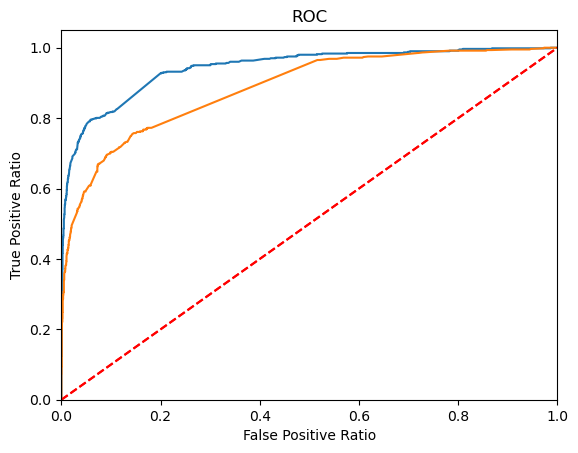

[CV] END max_depth=0, min_samples_split=2, n_estimators=1200; total time=   0.1s
[CV] END max_depth=1, min_samples_split=2, n_estimators=1200; total time=   9.6s
[CV] END max_depth=1, min_samples_split=10, n_estimators=1200; total time=   9.4s
[CV] END max_depth=2, min_samples_split=2, n_estimators=1200; total time=  14.4s
[CV] END max_depth=3, min_samples_split=2, n_estimators=1200; total time=  21.9s
[CV] END max_depth=3, min_samples_split=10, n_estimators=1200; total time=  20.4s
[CV] END max_depth=0, min_samples_split=10, n_estimators=1200; total time=   0.0s
[CV] END max_depth=0, min_samples_split=10, n_estimators=1200; total time=   0.0s
[CV] END max_depth=1, min_samples_split=10, n_estimators=1200; total time=   7.9s
[CV] END max_depth=2, min_samples_split=10, n_estimators=1200; total time=  13.4s
[CV] END max_depth=0, min_samples_split=2, n_estimators=1200; total time=   0.1s
[CV] END max_depth=0, min_samples_split=10, n_estimators=1200; total time=   0.0s
[CV] END max_depth=1,

In [93]:
logit_roc_auc=roc_auc_score(y_gbm,gbm_model.predict(X_gbm))
fpr,tpr,thresholds=roc_curve(y_gbm,gbm_model.predict_proba(X_gbm)[:,1])
plt.figure()
plt.plot(fpr,tpr, label="AUC(area=%0.2f)"%logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Ratio")
plt.ylabel("True Positive Ratio")
plt.title("ROC")
plt.show;
#UCDEGERLENDIRICI
logit_roc_auc_uc=roc_auc_score(y_gbm_uc,gbm_model_uc.predict(X_gbm_uc))
fpr_uc,tpr_uc,thresholds_uc=roc_curve(y_gbm_uc,gbm_model_uc.predict_proba(X_gbm_uc)[:,1])

plt.plot(fpr_uc,tpr_uc, label="AUC(area=%0.2f)"%logit_roc_auc_uc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Ratio")
plt.ylabel("True Positive Ratio")
plt.title("ROC")
plt.show;

logit_roc_auc_urunhiz_cv_ikilimodel=roc_auc_score(y_gbm_urunhiz_cv_ikilimodel,gbm_model_urunhiz_cv_ikilimodel.predict(X_gbm_urunhiz_cv_ikilimodel))
fpr_urunhiz_cv_ikilimodel,tpr_urunhiz_cv_ikilimodel,thresholds_urunhiz_cv_ikilimodel=roc_curve(y_gbm_urunhiz_cv_ikilimodel,gbm_model_urunhiz_cv_ikilimodel.predict_proba(X_gbm_urunhiz_cv_ikilimodel)[:,1])

plt.plot(fpr_urunhiz_cv_ikilimodel,tpr_urunhiz_cv_ikilimodel, label="AUC(area=%0.2f)"%logit_roc_auc_urunhiz_cv_ikilimodel)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Ratio")
plt.ylabel("True Positive Ratio")
plt.title("ROC")
plt.show;
pyplot. text("aaa")